In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the file 

In [2]:
#load the excel file as a dataframe
df = pd.read_excel('Makert Prices 2022.xlsx')
# first five rows
df.head()

Dates  Seasons          Bull          Cow        Heifer         Steer
0 2009-08-01  Drought   8500.000000   966.666667   1666.666667    766.666667
1 2009-09-01  Drought  18000.000000  4000.000000  15000.000000  13000.000000
2 2009-10-01  Drought   8500.000000  5000.000000   8000.000000   9000.000000
3 2009-11-01  Drought  12484.312740  4815.021851   5198.550137  11302.715033
4 2009-12-01      Wet  22166.666667  9477.777778  10111.111111  18222.222222

In [3]:
df.columns

Index(['Dates', 'Seasons', 'Bull', 'Cow', 'Heifer', 'Steer'], dtype='object')

# Data Wrangling

In [4]:
# Basic metadata of the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Dates    154 non-null    datetime64[ns]
 1   Seasons  154 non-null    object        
 2   Bull     154 non-null    float64       
 3   Cow      154 non-null    float64       
 4   Heifer   154 non-null    float64       
 5   Steer    154 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 7.3+ KB


### Completeness 

In [5]:
df.isna().any()

Dates      False
Seasons    False
Bull       False
Cow        False
Heifer     False
Steer      False
dtype: bool

In [6]:
df.isnull().sum()

Dates      0
Seasons    0
Bull       0
Cow        0
Heifer     0
Steer      0
dtype: int64

### Consistency

In [7]:
#checking for duplicates

f'There are {df.duplicated().sum()} duplicates in the dataframe'

'There are 0 duplicates in the dataframe'

### Validity

In [8]:
df['Seasons'].value_counts()

Seasons
Wet        50
Dry        50
dry        24
Drought    13
drought    12
wet         5
Name: count, dtype: int64

The `Dry` and `dry` seasons seem to be similar as well as the `Drought` and `drought` seasons and the `wet` and `Wet` seasons. So lets make them all the same by having them be Proper titles

In [9]:
df.Seasons = df.Seasons.str.title()
df['Seasons'].value_counts()

Seasons
Dry        74
Wet        55
Drought    25
Name: count, dtype: int64

Now we have 3 seasons
* Dry
* Wet
* Drought

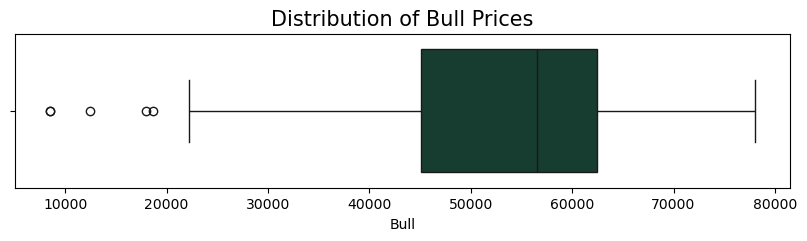

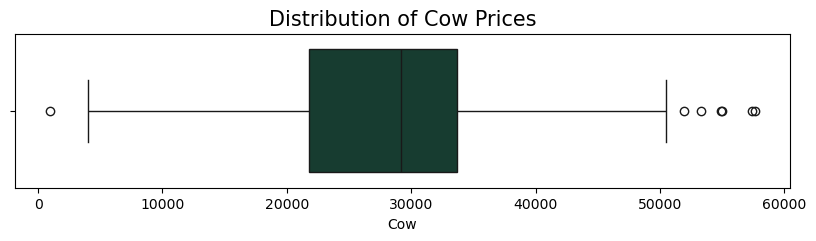

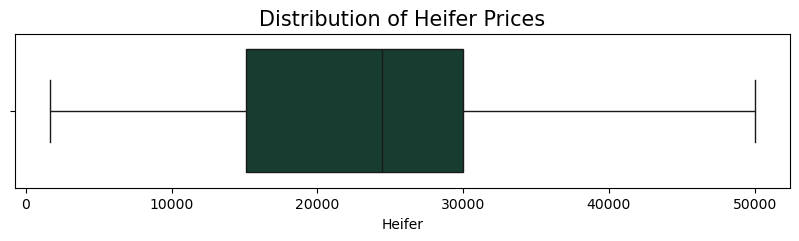

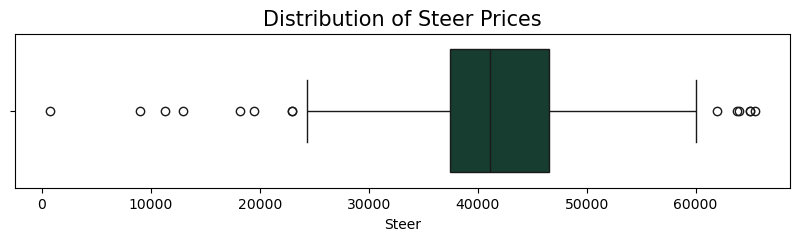

In [10]:
#Checking for outliers
def outliers(df, col):
    """
    This function visualises the outliers and outputs boxplots
    """
    plt.figure(figsize=(10,2))
    sns.boxplot(x=col, data=df, color= "#114232")
    plt.title(f'Distribution of {col} Prices', fontsize=15);

num_list=['Bull', 'Cow','Heifer', 'Steer']
for col in num_list:
    outliers(df,col)

In [11]:
df['Seasons']= df['Seasons'].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Dates    154 non-null    datetime64[ns]
 1   Seasons  154 non-null    category      
 2   Bull     154 non-null    float64       
 3   Cow      154 non-null    float64       
 4   Heifer   154 non-null    float64       
 5   Steer    154 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(4)
memory usage: 6.4 KB


In [13]:
# Basic description of numerical features

df.describe().T

count                           mean                  min  \
Dates     154  2015-12-17 21:30:23.376623360  2009-08-01 00:00:00   
Bull    154.0                   53296.236208               8500.0   
Cow     154.0                   28102.985031           966.666667   
Heifer  154.0                   23831.001561          1666.666667   
Steer   154.0                    41550.11114           766.666667   

                        25%                  50%                  75%  \
Dates   2012-10-08 18:00:00  2015-12-16 12:00:00  2019-02-22 00:00:00   
Bull                45100.0         56503.850527          62417.57515   
Cow            21780.739223         29150.409072         33659.749804   
Heifer         15083.333333         24461.740493         29975.666924   
Steer          37421.703386         41150.249088         46531.278194   

                        max           std  
Dates   2022-07-29 00:00:00           NaN  
Bull                78000.0  13837.139183  
Cow             57613.00104   9973.969461  
Heifer              50000.0  10485.280024  
Steer          65411.537154  10678.454015

## Exploratory Data Analysis

### Univariate Analysis

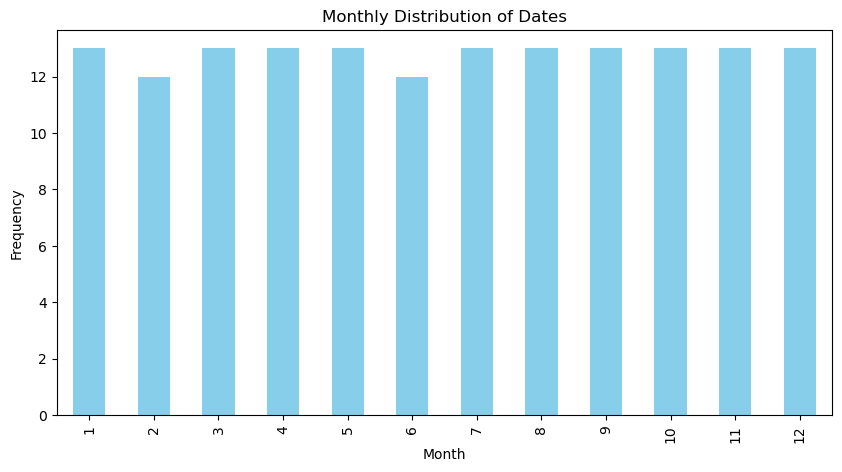

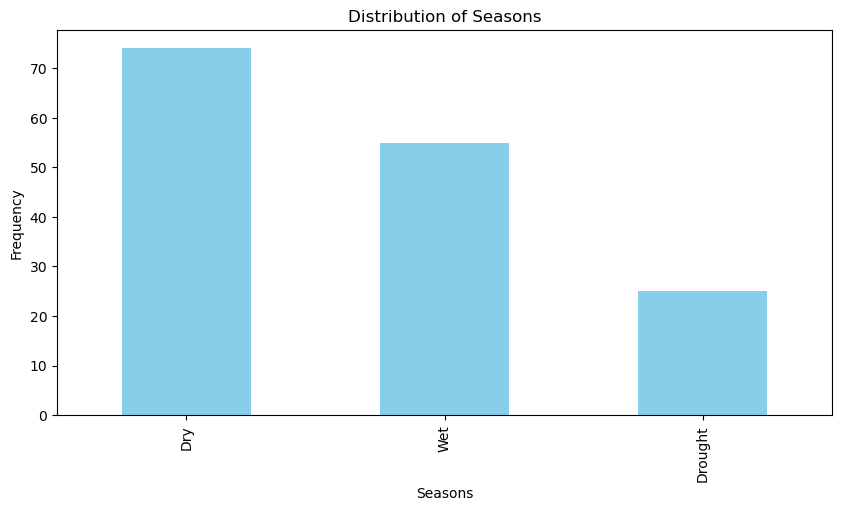

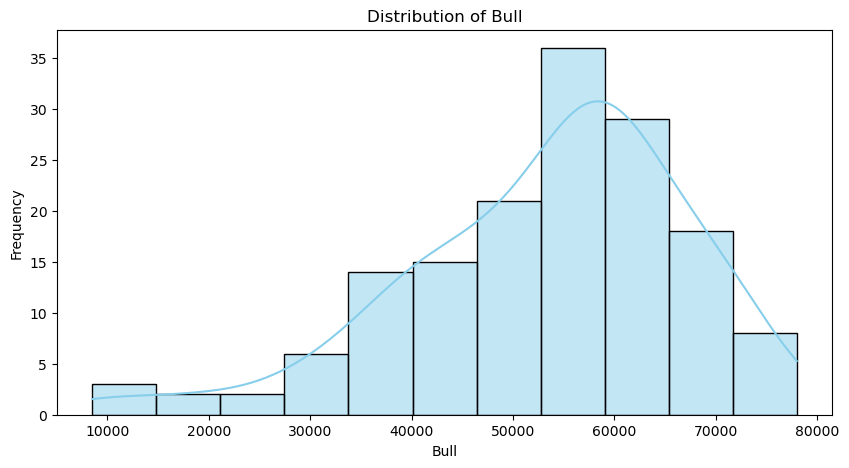

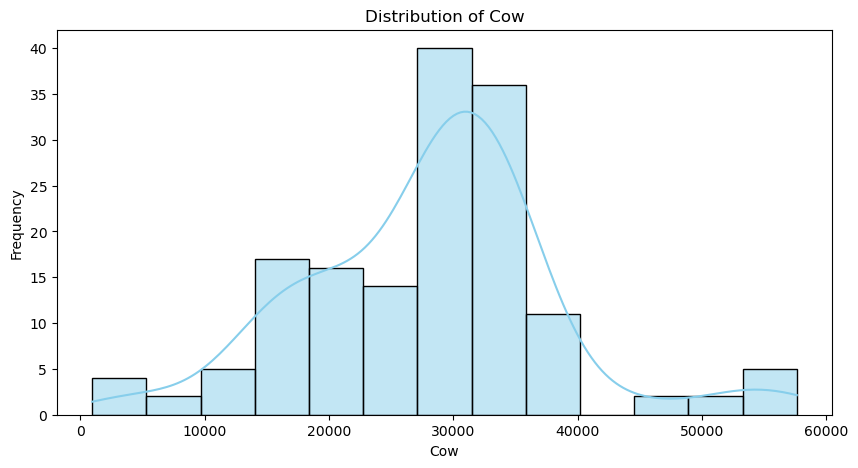

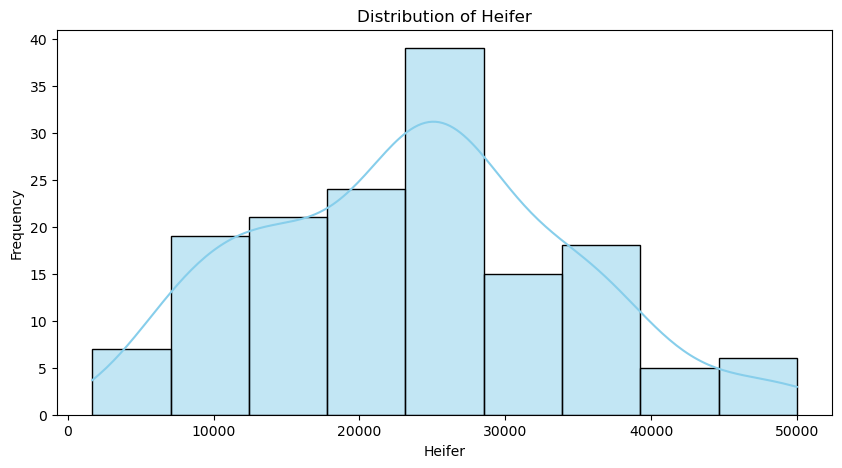

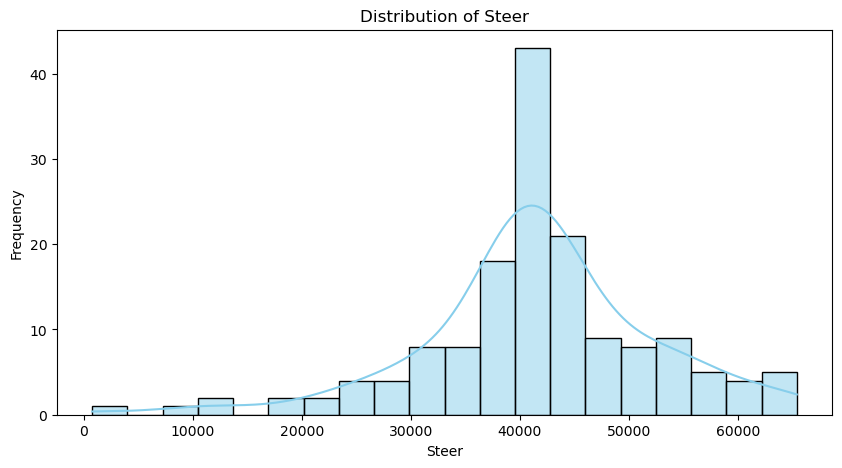

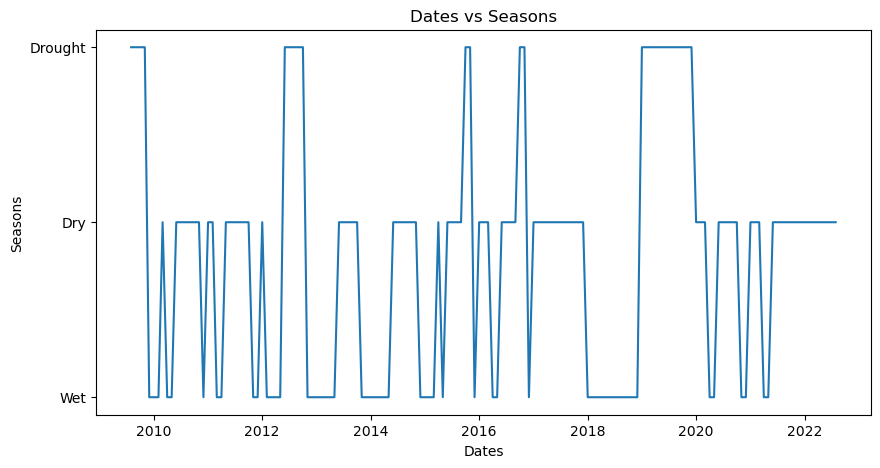

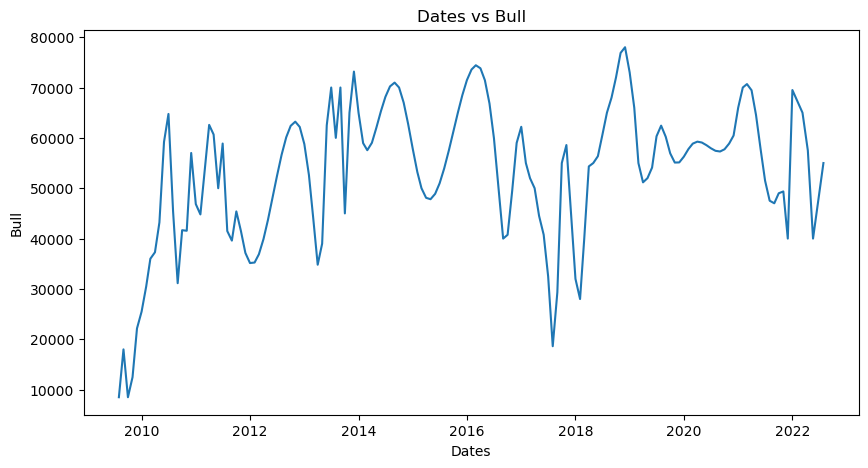

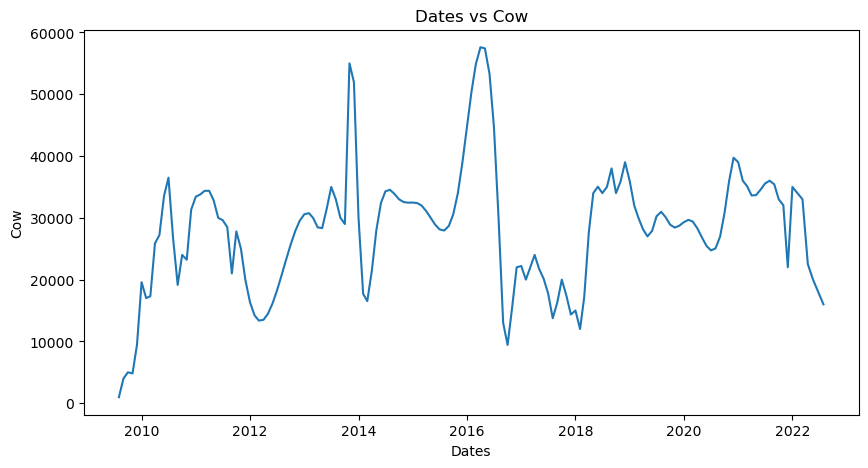

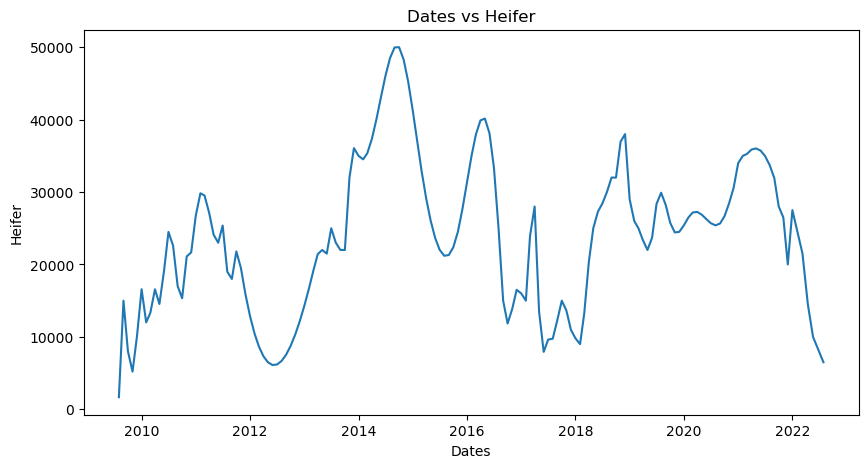

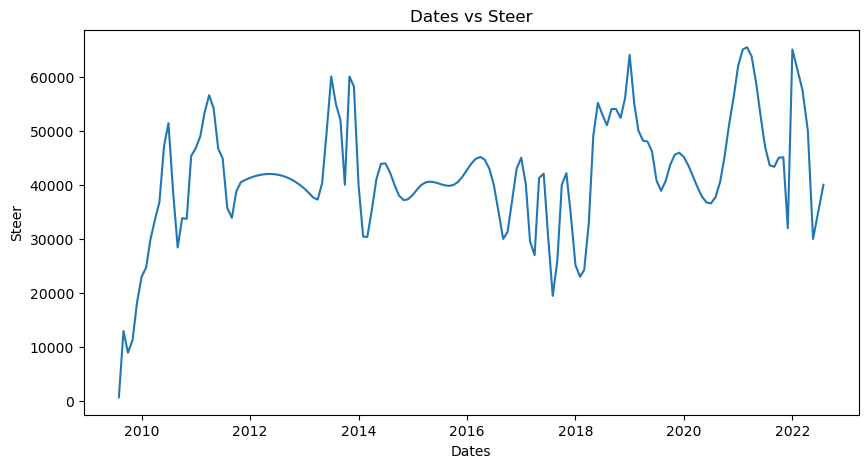

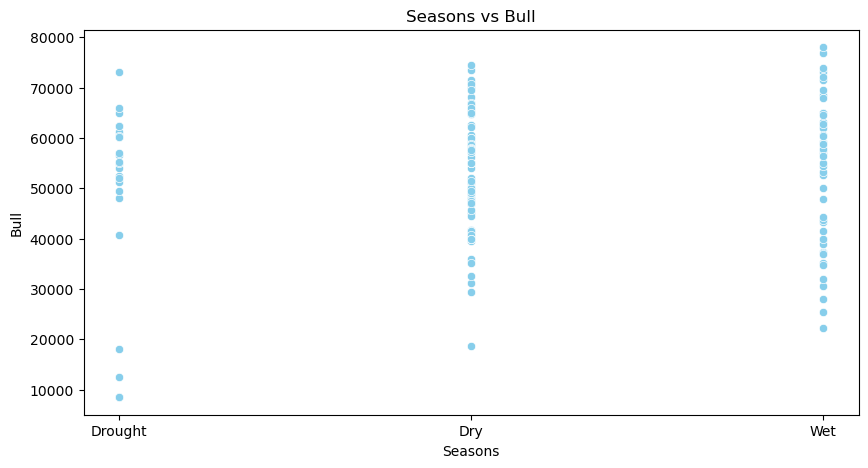

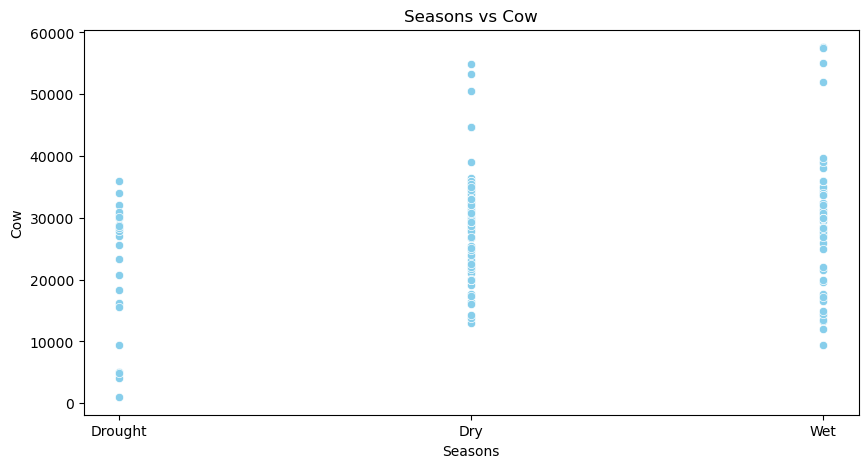

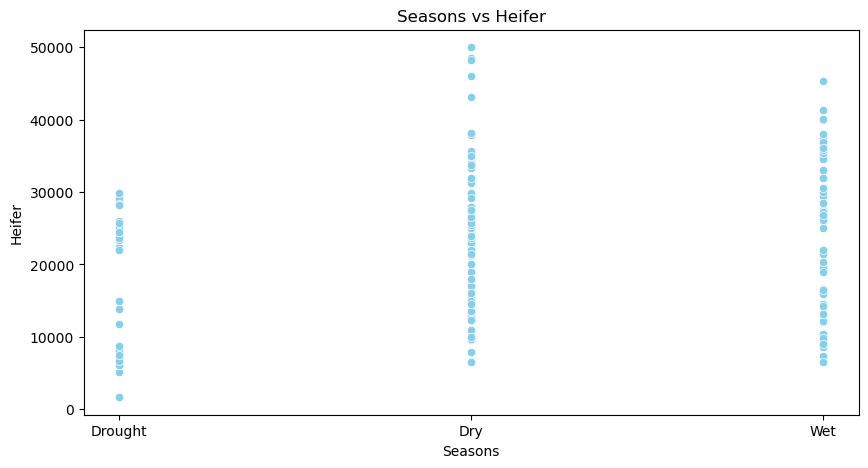

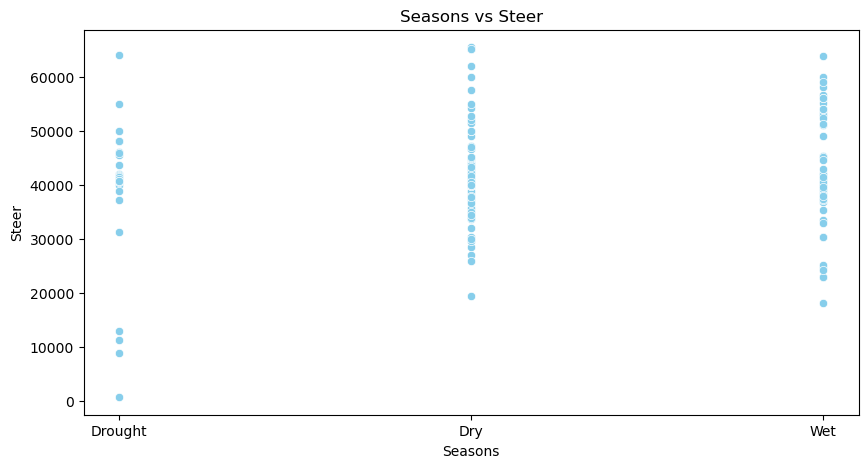

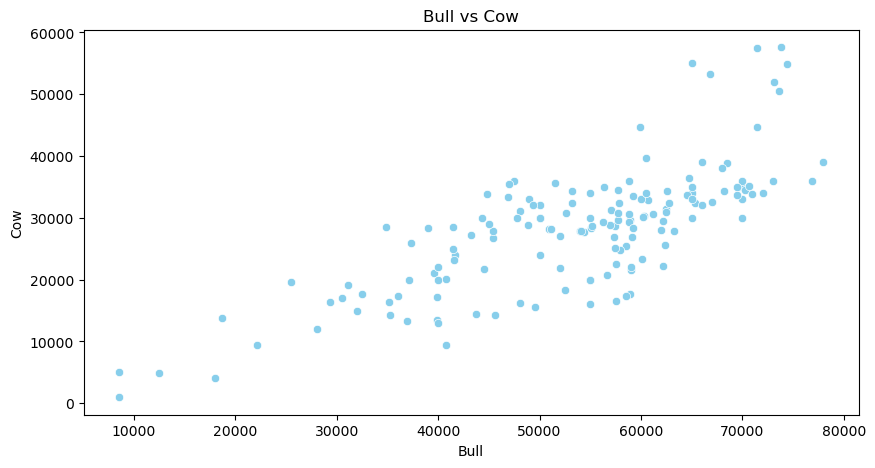

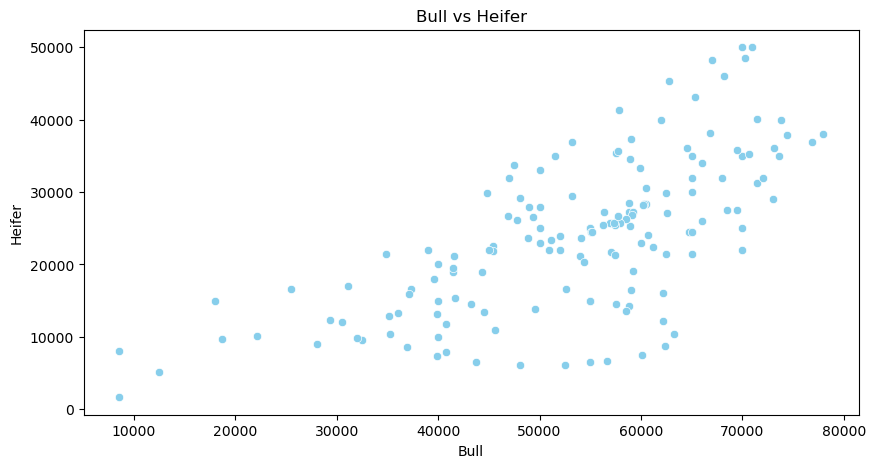

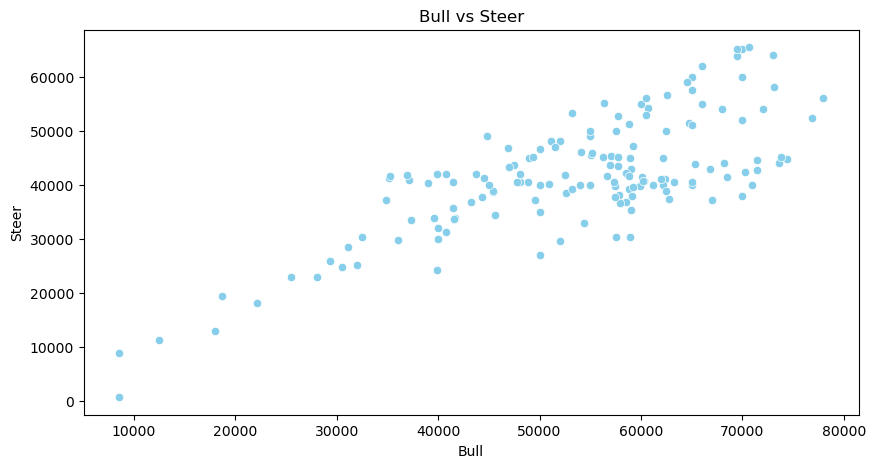

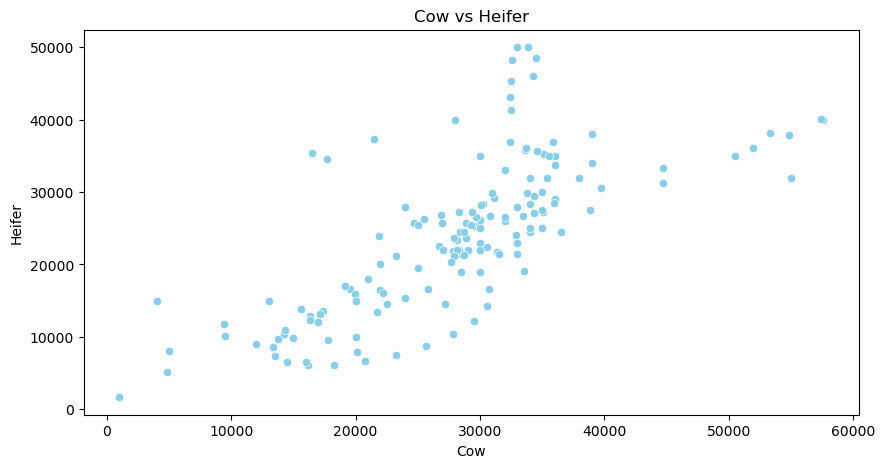

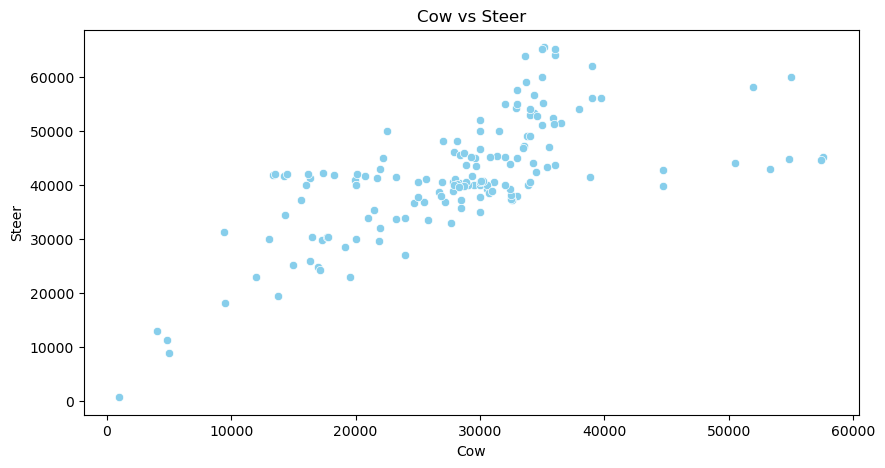

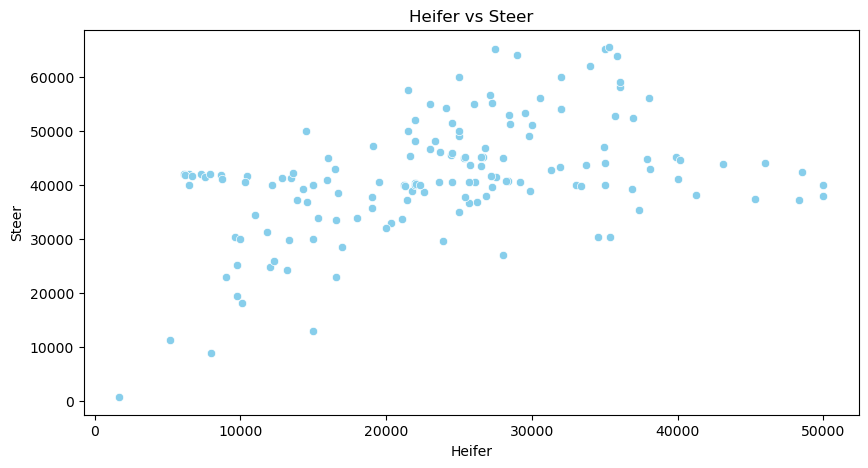

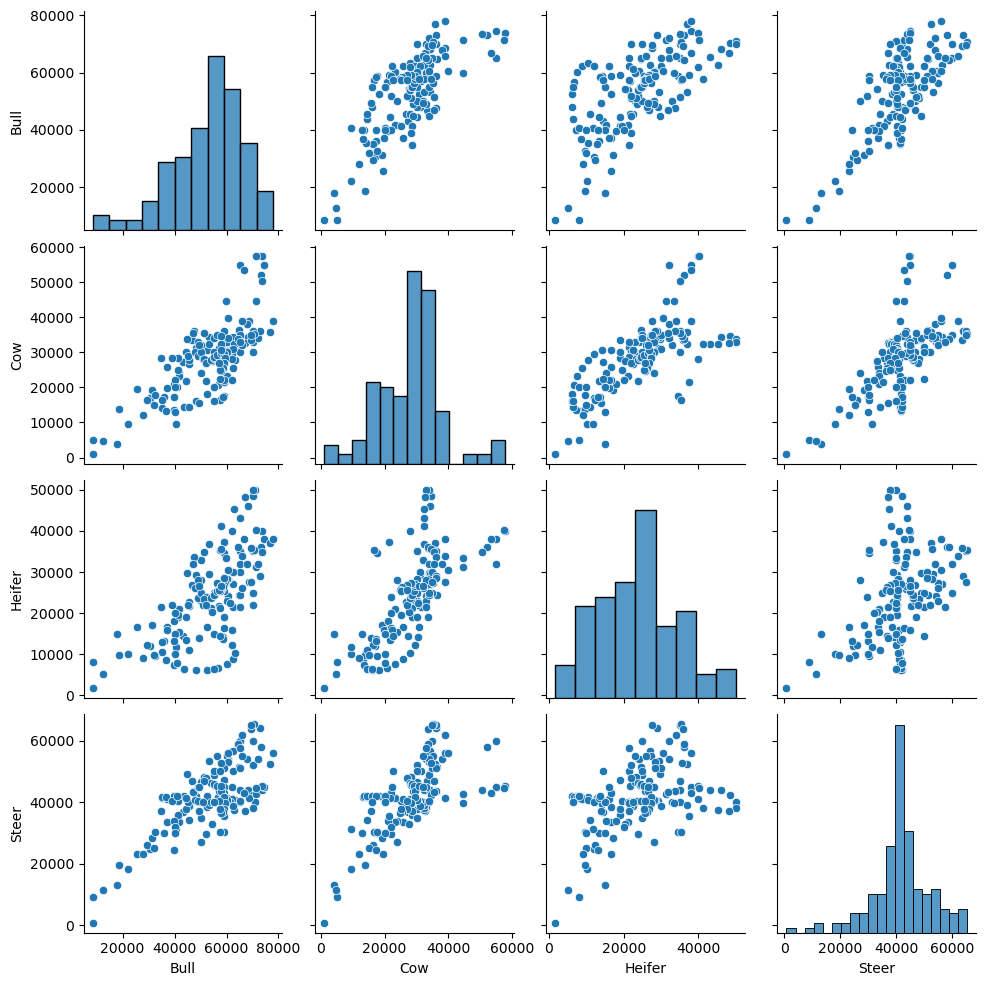

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_dataset(data):
    # Univariate Analysis
    def univariate_analysis(column):
        plt.figure(figsize=(10, 5))
        if data[column].dtype == 'datetime64[ns]':
            data[column].dt.month.value_counts().sort_index().plot(kind='bar', color='skyblue')
            plt.title('Monthly Distribution of ' + column)
            plt.xlabel('Month')
            plt.ylabel('Frequency')
        elif data[column].dtype.name == 'category':
            data[column].value_counts().plot(kind='bar', color='skyblue')
            plt.title('Distribution of ' + column)
            plt.xlabel(column)
            plt.ylabel('Frequency')
        else:
            sns.histplot(data[column], kde=True, color='skyblue')
            plt.title('Distribution of ' + column)
            plt.xlabel(column)
            plt.ylabel('Frequency')
        plt.show()

    # Bivariate Analysis
    def bivariate_analysis(x, y):
        plt.figure(figsize=(10, 5))
        if data[x].dtype == 'datetime64[ns]':
            sns.lineplot(data=data, x=x, y=y)
            plt.title('{} vs {}'.format(x, y))
        elif data[x].dtype.name == 'category' and data[y].dtype.name == 'category':
            sns.heatmap(pd.crosstab(data[x], data[y]), annot=True, cmap='coolwarm')
            plt.title('{} vs {}'.format(x, y))
        else:
            sns.scatterplot(data=data, x=x, y=y, color='skyblue')
            plt.title('{} vs {}'.format(x, y))
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()

    # Multivariate Analysis
    def multivariate_analysis(columns):
        sns.pairplot(data[columns])
        plt.show()

    # Call functions for analysis
    for column in data.columns:
        univariate_analysis(column)

    for i in range(len(data.columns)):
        for j in range(i+1, len(data.columns)):
            bivariate_analysis(data.columns[i], data.columns[j])

    multivariate_analysis(data.columns)

# Example usage:
analyze_dataset(df)


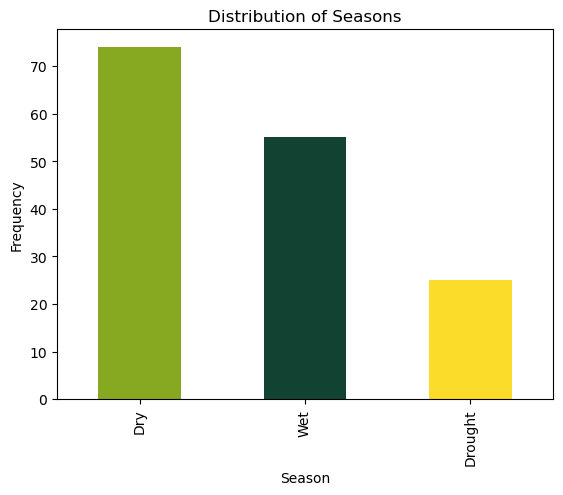

In [15]:
colors = ['#87A922', '#114232', '#FCDC2A']

df['Seasons'].value_counts().plot(kind='bar', color=colors)
plt.title('Distribution of Seasons')
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.show()


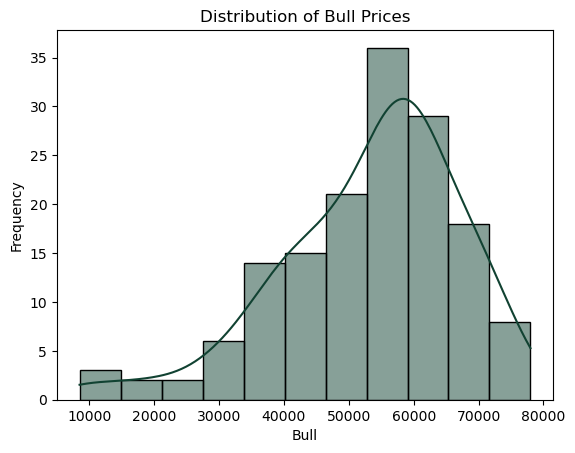

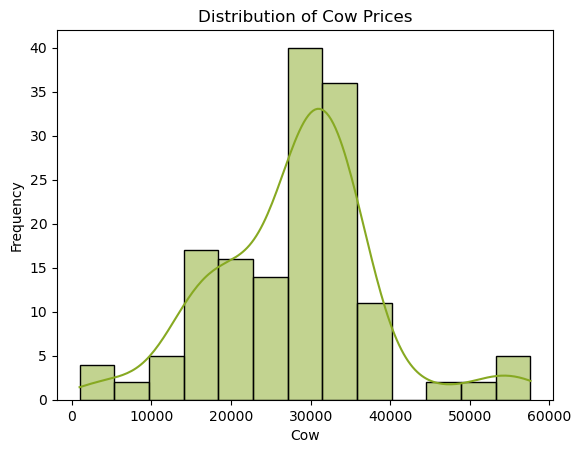

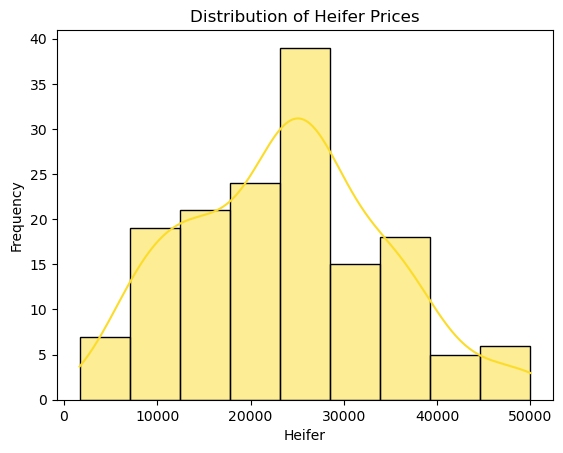

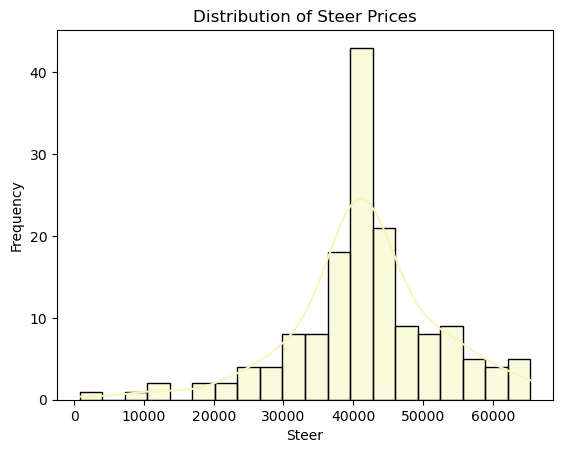

In [16]:
# Define colors for the histograms
colors = ['#114232', '#87A922', '#FCDC2A', '#F7F6BB']

# Loop through each column starting from the fourth column
for column, color in zip(df.columns[2:], colors):
    # Create histogram
    sns.histplot(df[column], kde=True, color=color)
    
    # Set title, x-label, y-label
    plt.title(f'Distribution of {column} Prices')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Show the plot for this column
    plt.show()


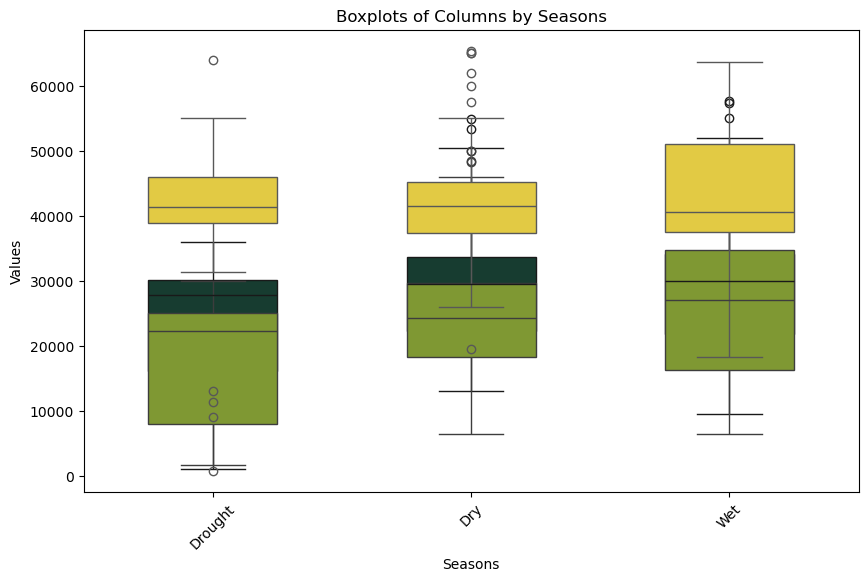

In [17]:
# Define colors as a list
colors = ['#114232', '#87A922', '#FCDC2A', '#F7F6BB']

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Loop through each column starting from the fourth column
for i, column in enumerate(df.columns[3:]):
    # Create boxplot
    sns.boxplot(x='Seasons', y=column, data=df, color=colors[i % len(colors)], width=0.5)
    
# Set title, x-label, y-label
plt.title('Boxplots of Columns by Seasons')
plt.xlabel('Seasons')
plt.ylabel('Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


<Axes: xlabel='Seasons', ylabel='Bull'>

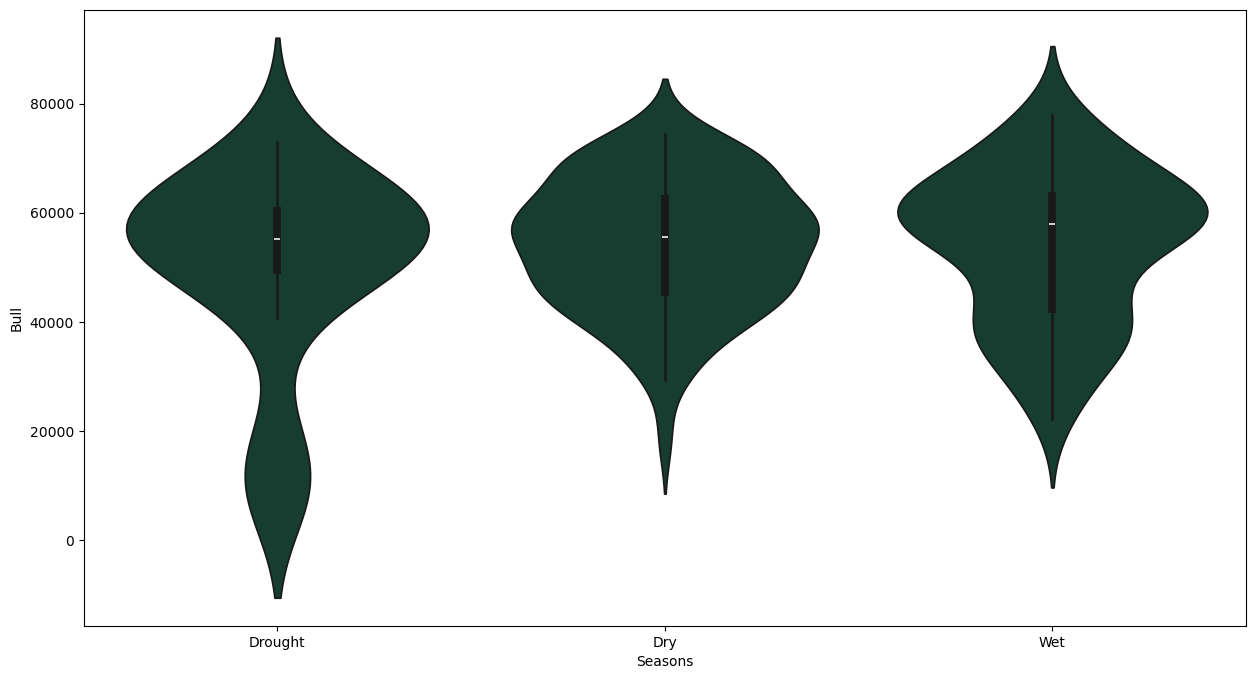

In [18]:

plt.figure(figsize=(15,8))
sns.violinplot(x= 'Seasons' , y = 'Bull', data = df, hue_order=df.Seasons.value_counts(), color='#114232' )

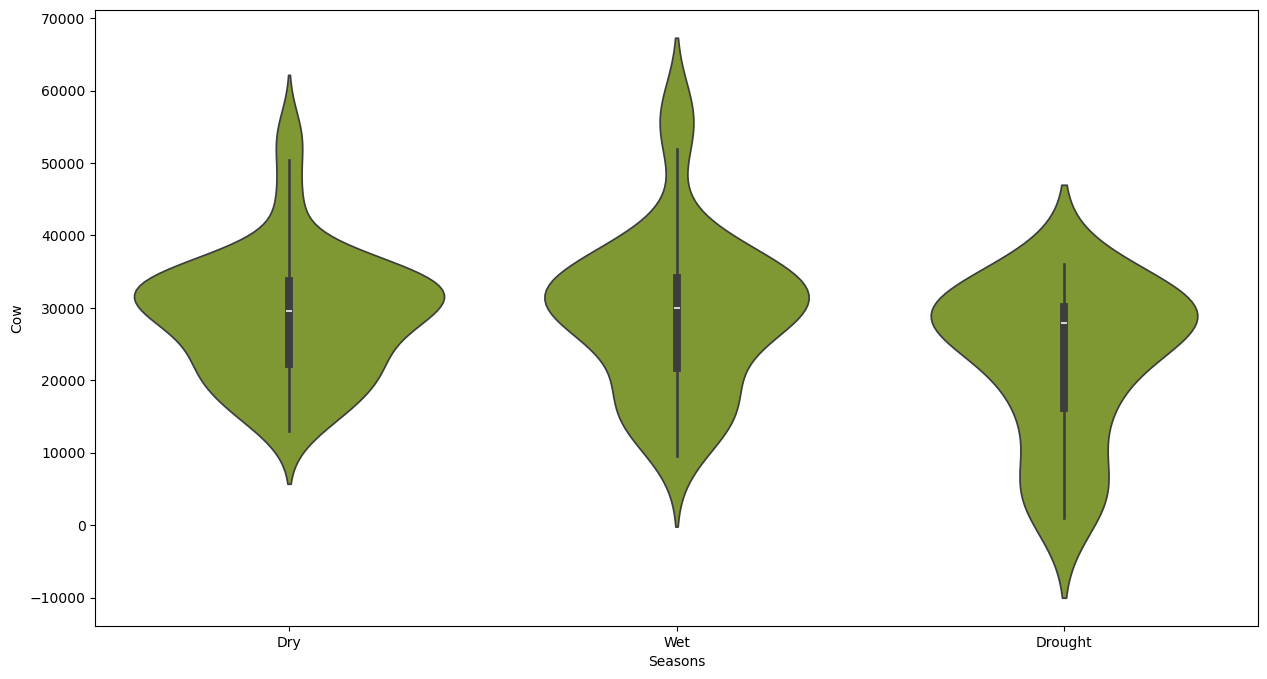

In [19]:
plt.figure(figsize=(15, 8))
sns.violinplot(x='Seasons', y='Cow', data=df, order=df['Seasons'].value_counts().index, color= '#87A922',)
plt.show()


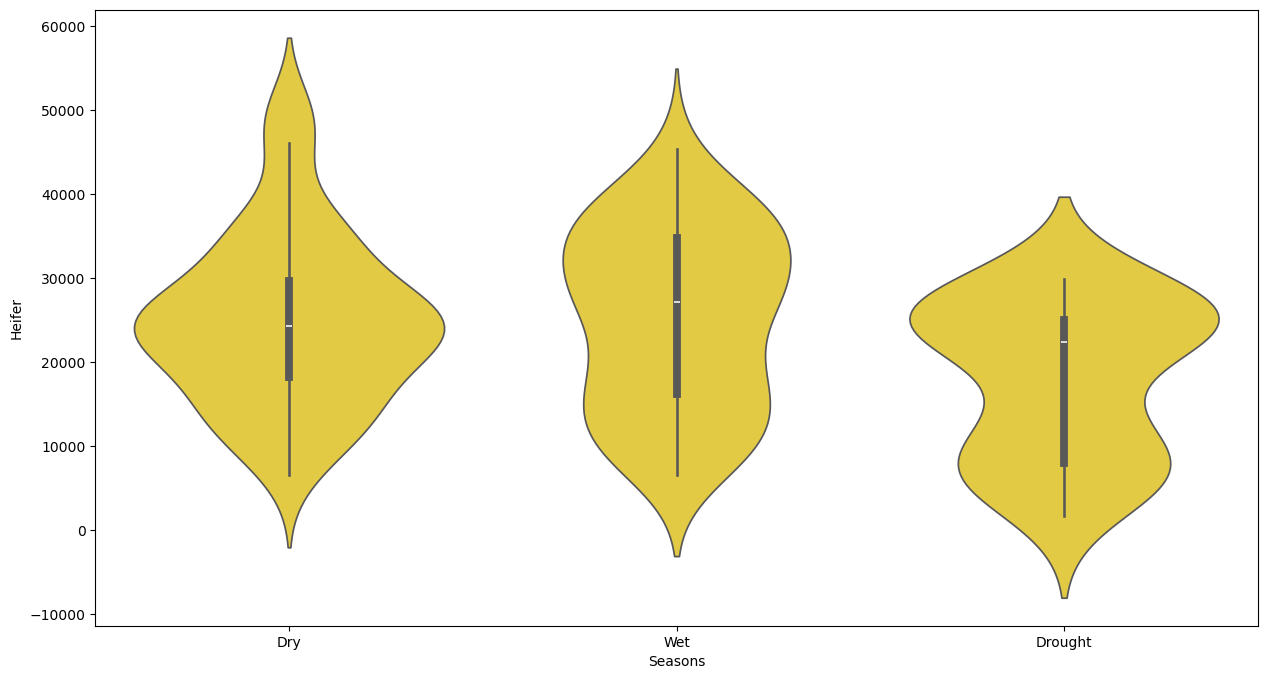

In [20]:
plt.figure(figsize=(15, 8))
sns.violinplot(x='Seasons', y='Heifer', data=df, order=df['Seasons'].value_counts().index, color='#FCDC2A' )
plt.show()


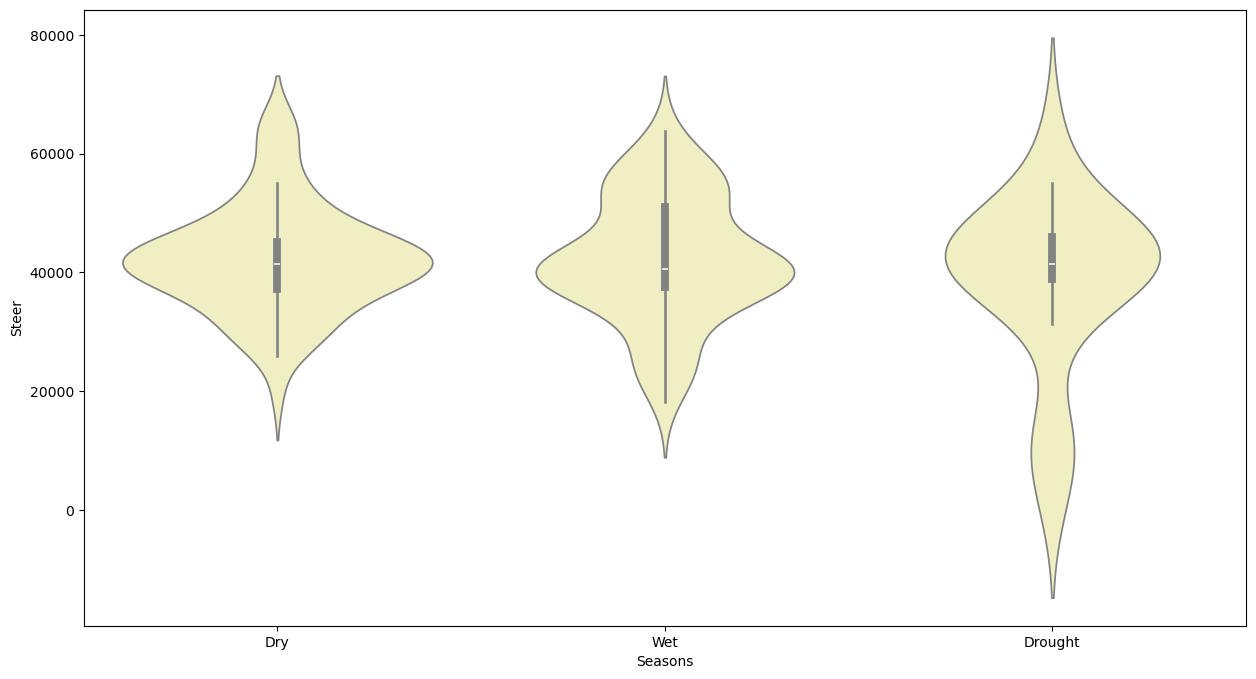

In [21]:
plt.figure(figsize=(15, 8))
sns.violinplot(x='Seasons', y='Steer', data=df, order=df['Seasons'].value_counts().index, color= '#F7F6BB' )
plt.show()

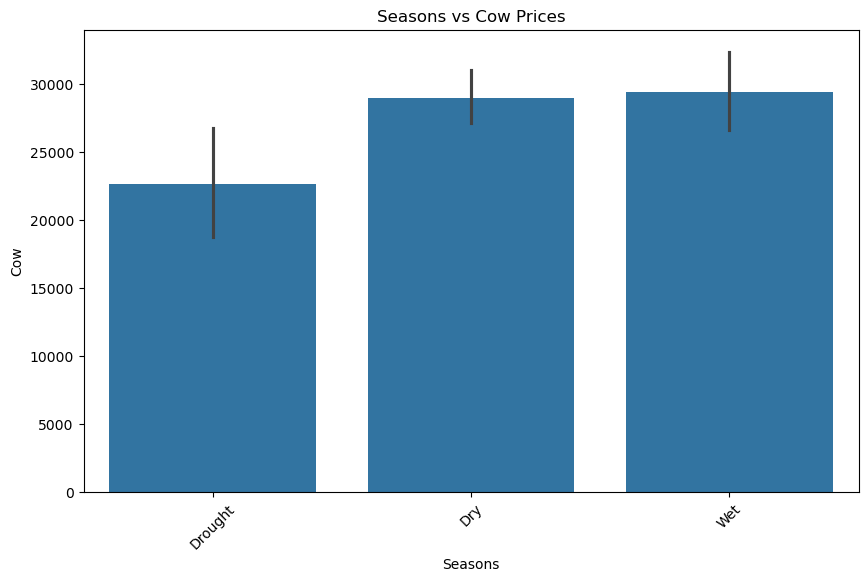

In [22]:
def plot_categorical_vs_numerical(df, categorical_column, numerical_column):
    """
    Plot a bar chart of a categorical column against a numerical column.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        categorical_column (str): The name of the categorical column.
        numerical_column (str): The name of the numerical column.
    """
    # Set the size of the plot
    plt.figure(figsize=(10, 6))

    # Create the bar plot
    sns.barplot(x=categorical_column, y=numerical_column, data=df)

    # Set title and labels
    plt.title(f'{categorical_column} vs {numerical_column} Prices')
    plt.xlabel(categorical_column)
    plt.ylabel(numerical_column)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()

plot_categorical_vs_numerical(df, 'Seasons', 'Cow')


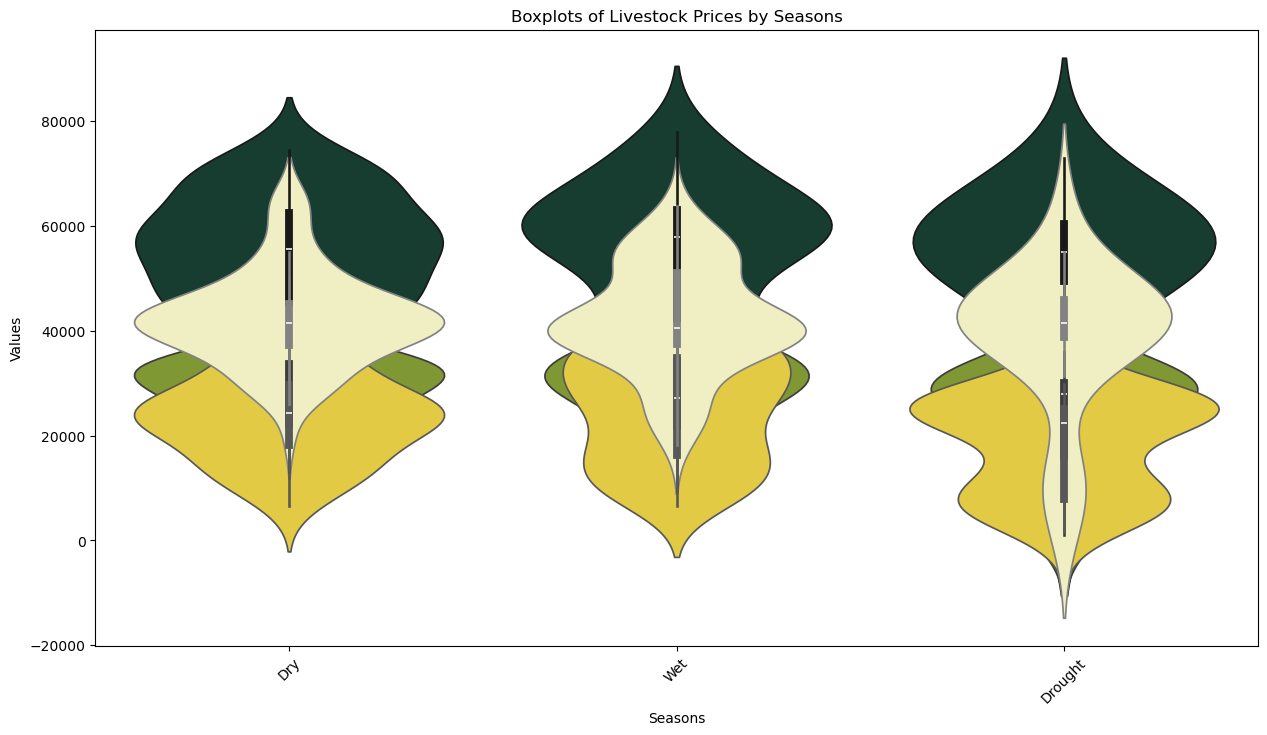

In [23]:


# Set the size of the plot
plt.figure(figsize=(15, 8))

# Define colors as a list
colors = ['#114232', '#87A922', '#FCDC2A', '#F7F6BB']

# Loop through each column in the list
for i, column in enumerate(df.columns[2:]):
    # Create boxplot
    sns.violinplot(x='Seasons', y=column, data=df, order=df['Seasons'].value_counts().index, color=colors[i % len(colors)])
    
# Set title, x-label, y-label
plt.title('Boxplots of Livestock Prices by Seasons')
plt.xlabel('Seasons')
plt.ylabel('Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()



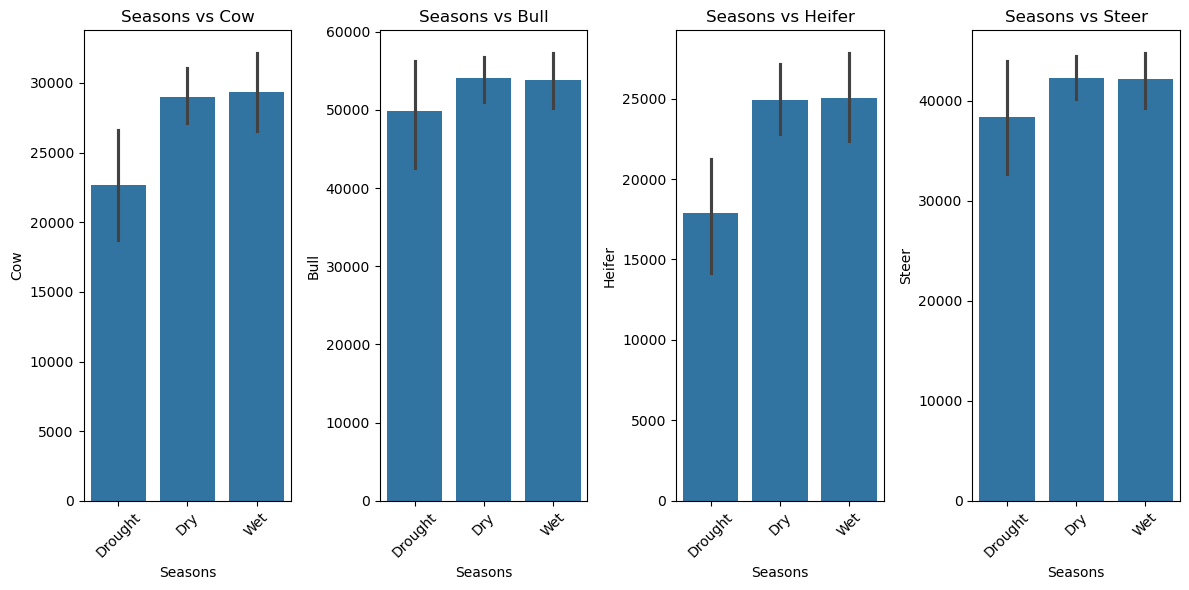

In [24]:

def plot_categorical_vs_numerical(df, categorical_column, numerical_columns):
    """
    Plot bar charts of numerical columns against a categorical column.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        categorical_column (str): The name of the categorical column.
        numerical_columns (list): The names of the numerical columns.
    """
    # Set the size of the plot
    plt.figure(figsize=(12, 6))

    # Loop through each numerical column
    for i, numerical_column in enumerate(numerical_columns, start=1):
        plt.subplot(1, len(numerical_columns), i)
        
        # Create the bar plot
        sns.barplot(x=categorical_column, y=numerical_column, data=df)
        
        # Set title and labels for each subplot
        plt.title(f'{categorical_column} vs {numerical_column}')
        plt.xlabel(categorical_column)
        plt.ylabel(numerical_column)

        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

plot_categorical_vs_numerical(df, 'Seasons', ['Cow', 'Bull', 'Heifer','Steer' ])


In [25]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# def plot_categorical_vs_numerical(df, categorical_column, numerical_columns):
#     """
#     Plot bar charts of numerical columns against a categorical column.

#     Parameters:
#         df (DataFrame): The DataFrame containing the data.
#         categorical_column (str): The name of the categorical column.
#         numerical_columns (list): The names of the numerical columns.
#     """
#     # Set the size of the plot
#     plt.figure(figsize=(12, 6))
    
#     # Create a combined barplot for all numerical columns
#     for numerical_column in numerical_columns:
#         sns.barplot(x=categorical_column, y=numerical_column, data=df, label=numerical_column)

#     # Set title and labels
#     plt.title(f'{categorical_column} vs Numerical Columns')
#     plt.xlabel(categorical_column)
#     plt.ylabel('Value')

#     # Add legend
#     plt.legend(title='Numerical Column')
    
#     # Rotate x-axis labels for better readability
#     plt.xticks(rotation=45)

#     # Show the plot
#     plt.show()


# plot_categorical_vs_numerical(df, 'Seasons', ['Cow', 'Bull', 'Heifer', 'Steer'])


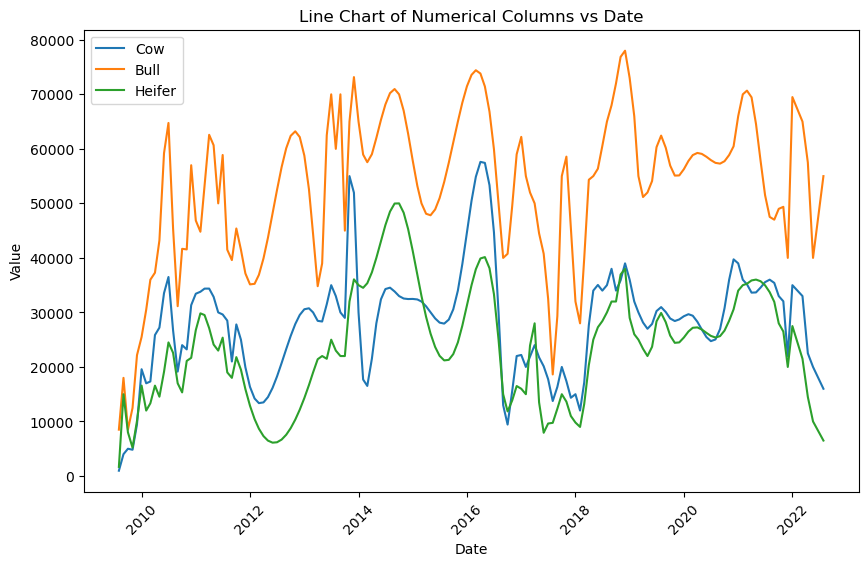

In [25]:
def line_chart_numerical_vs_date(df, date_column, numerical_columns):
    """
    Plot line chart of three numerical columns against dates.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        date_column (str): The name of the date column.
        numerical_columns (list): The names of the numerical columns.
    """
    # Set the size of the plot
    plt.figure(figsize=(10, 6))
    
    # Plot each numerical column against the date
    for column in numerical_columns:
        plt.plot(df[date_column], df[column], label=column)
    
    # Add title and labels
    plt.title('Line Chart of Numerical Columns vs Date')
    plt.xlabel('Date')
    plt.ylabel('Value')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Add legend
    plt.legend()
    
    # Show the plot
    plt.show()

line_chart_numerical_vs_date(df, 'Dates', ['Cow', 'Bull', 'Heifer'])


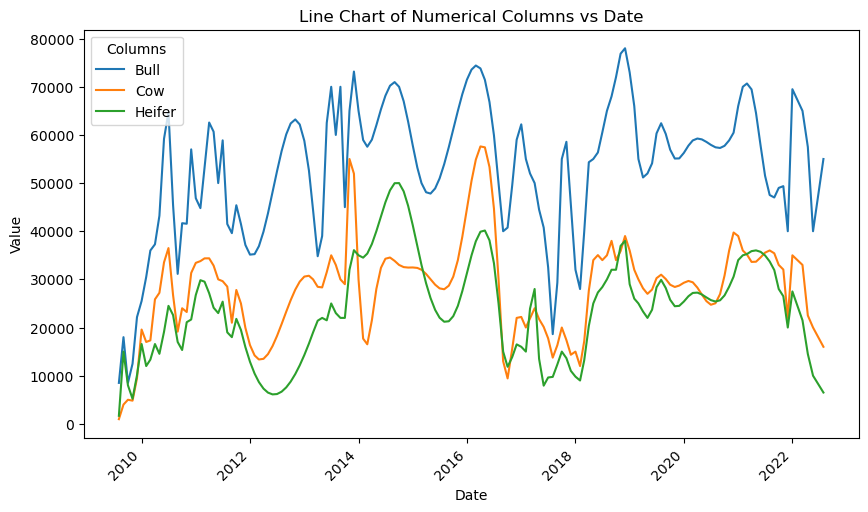

In [26]:
# Assuming your DataFrame is named df
pivot_table = pd.pivot_table(data=df, values=['Cow', 'Bull', 'Heifer'], index='Dates')

# Plot the pivot table
pivot_table.plot(figsize=(10, 6))
plt.title('Line Chart of Numerical Columns vs Date')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Columns')
plt.show()


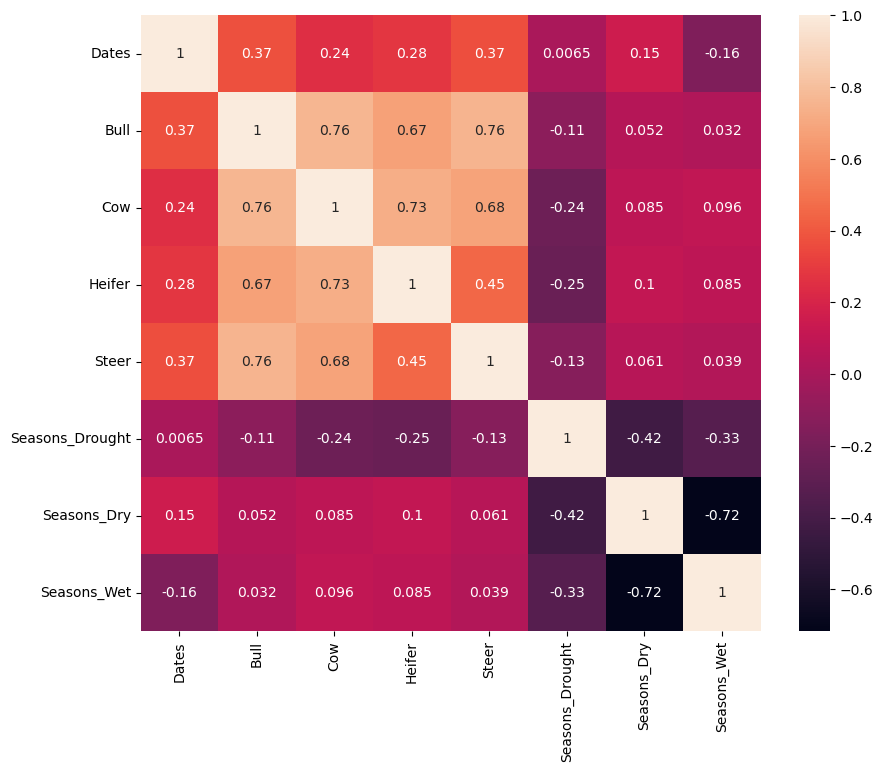

In [27]:
# Assuming 'Seasons' is a categorical column in your DataFrame
# Convert 'Seasons' column to one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Seasons'])

# Generate the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True)
plt.show()


## Modelling

We shall be using Time Series Analysis to predict the livestock prices 

Let us create 4 different dataframes to the different animals sold

#### Cow

In [28]:
Cow= df.loc[:, ['Dates', 'Cow']]
Cow.set_index('Dates', inplace= True)
Cow.head()

Cow
Dates                  
2009-08-01   966.666667
2009-09-01  4000.000000
2009-10-01  5000.000000
2009-11-01  4815.021851
2009-12-01  9477.777778

#### Bulls

In [29]:
Bull= df.loc[:, ['Dates', 'Bull']]
Bull.set_index('Dates', inplace= True)
Bull.head()

Bull
Dates                   
2009-08-01   8500.000000
2009-09-01  18000.000000
2009-10-01   8500.000000
2009-11-01  12484.312740
2009-12-01  22166.666667

#### Heifers

In [30]:
Heifer= df.loc[:, ['Dates', 'Heifer']]
Heifer.set_index('Dates', inplace= True)
Heifer.head()

Heifer
Dates                   
2009-08-01   1666.666667
2009-09-01  15000.000000
2009-10-01   8000.000000
2009-11-01   5198.550137
2009-12-01  10111.111111

#### Steers

In [31]:
Steer= df.loc[:, ['Dates', 'Steer']]
Steer.set_index('Dates', inplace= True)
Steer.head()

Steer
Dates                   
2009-08-01    766.666667
2009-09-01  13000.000000
2009-10-01   9000.000000
2009-11-01  11302.715033
2009-12-01  18222.222222

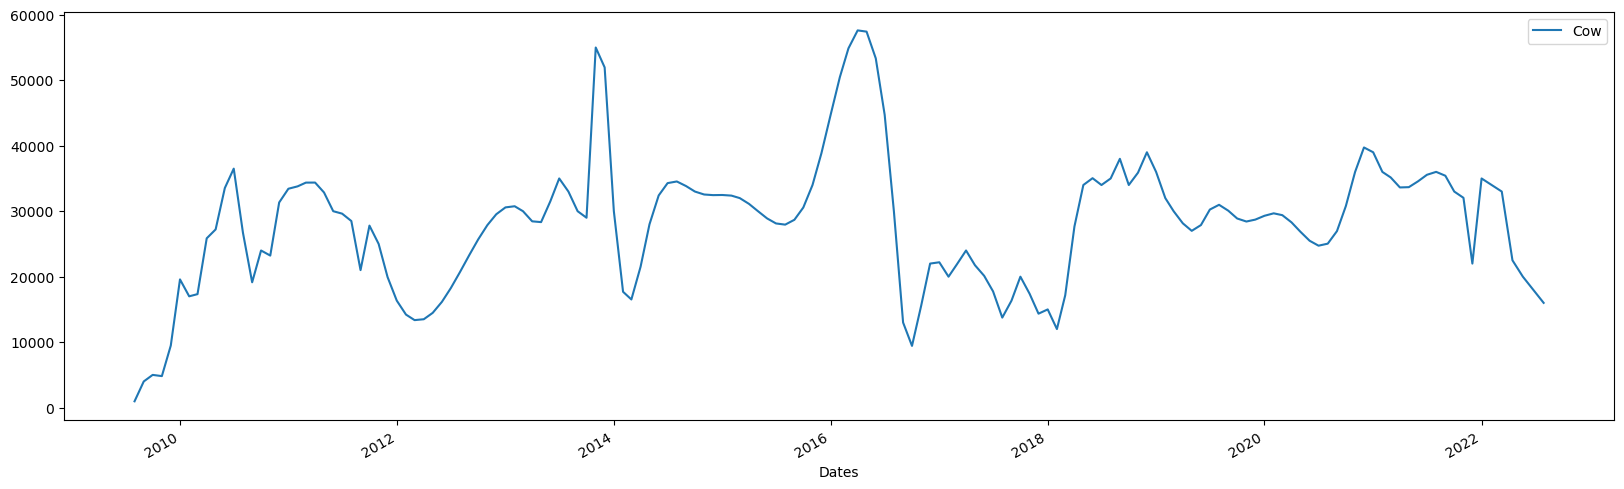

In [32]:
Cow.plot(figsize=(20,6));

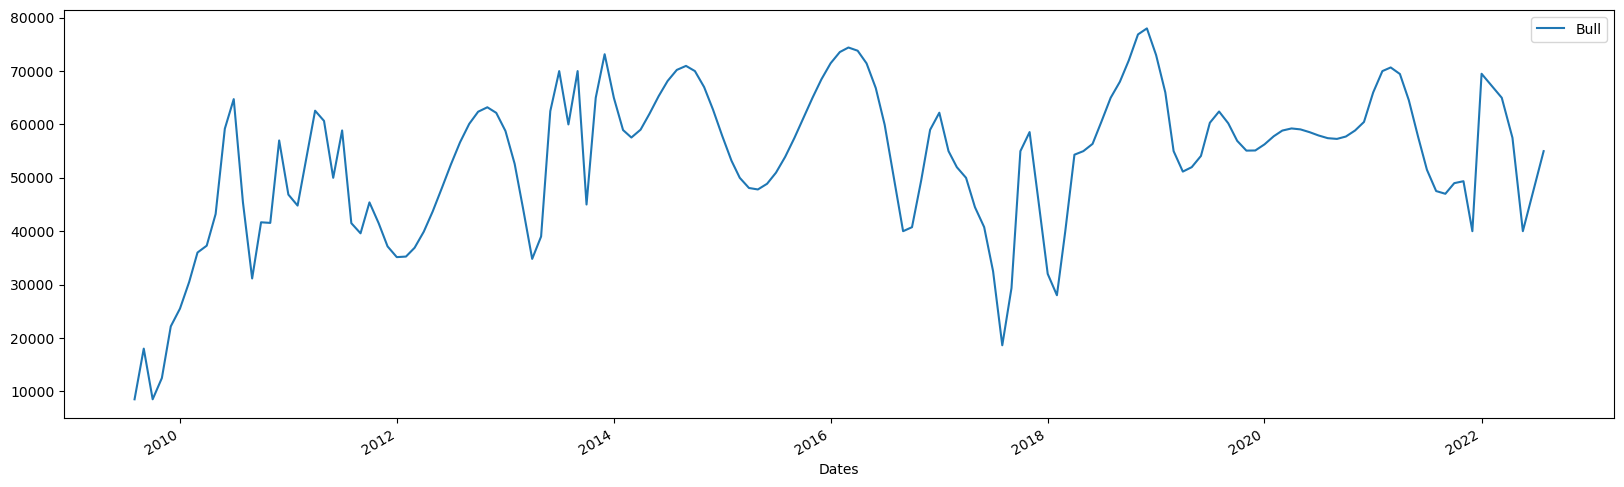

In [33]:
Bull.plot(figsize=(20,6));

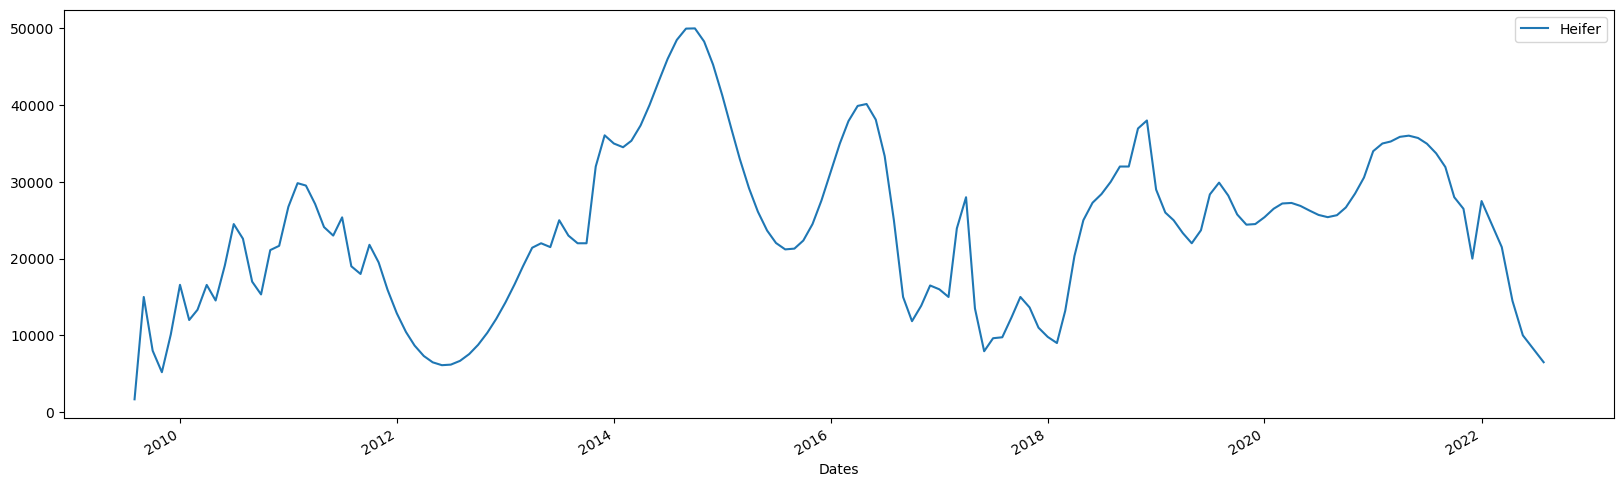

In [34]:
Heifer.plot(figsize=(20,6));

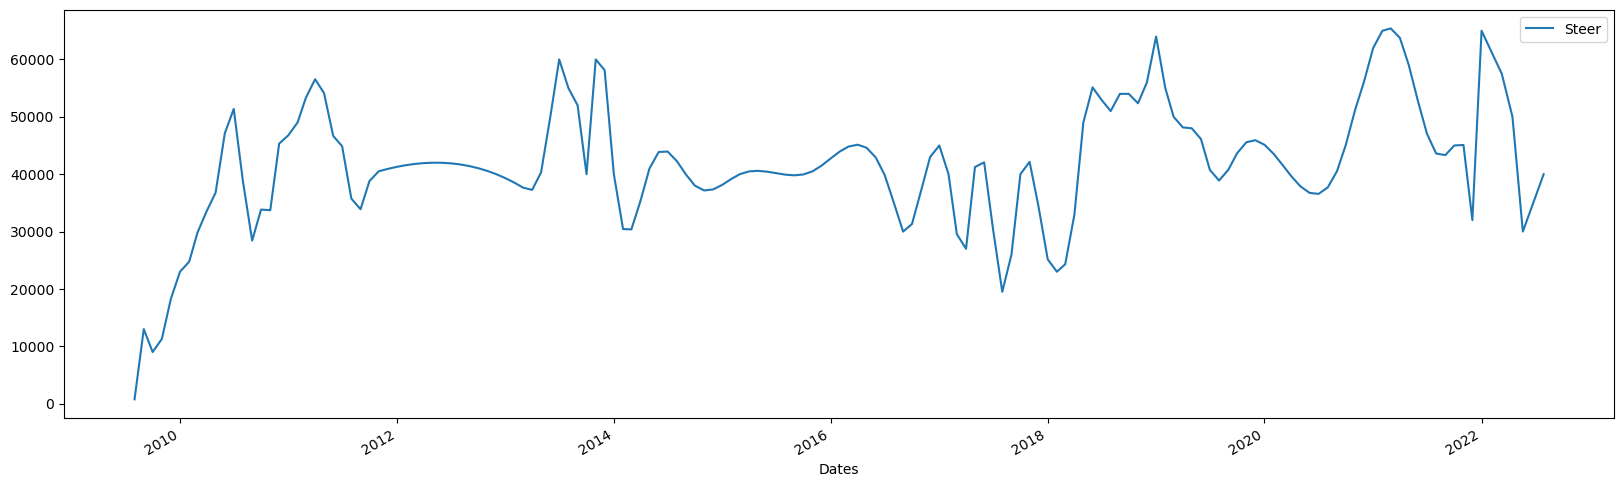

In [35]:
Steer.plot(figsize=(20,6));

In [36]:
# checking for rolling statistics

roll_mean = Cow.rolling(window=3, center=False).mean()
roll_std = Cow.rolling(window= 3, center=False).std()

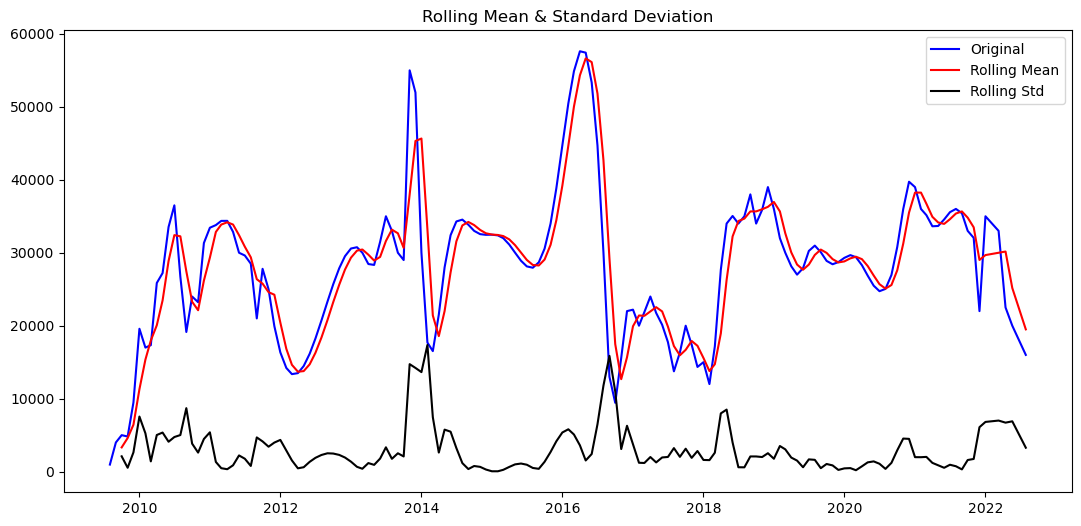

In [37]:
fig = plt.figure(figsize=(13,6))
plt.plot(Cow, color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

#### Stationarity
Checking for `Stationarity` using the Augmented Dickey-Fuller (ADF) Test

The ADF test is commonly used in econometrics, finance, and other fields dealing with time series data to determine the stationarity of a series before applying further analysis or modeling techniques.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

* Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
* Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
* We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

* p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
* p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [39]:
#Augmented Dickey–Fuller test:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(data_series):
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(data_series, autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
        
    return dfoutput


In [40]:
result = augmented_dickey_fuller_test(Cow['Cow'])
print(result)

Results of Dickey Fuller Test:
Test Statistic                  -4.962636
p-value                          0.000026
#Lags Used                       1.000000
Number of Observations Used    152.000000
Critical Value (1%)             -3.474121
Critical Value (5%)             -2.880750
Critical Value (10%)            -2.577013
dtype: float64


* Test Statistic: The test statistic value of approximately -4.96.
* p-value: The p-value is approximately 0.000026, which is below the common significance levels ( 0.05 or 0.01). This suggests strong evidence against the null hypothesis (the time series has a unit root) and indicates that the time series is likely stationary.
* #Lags Used: The number of lags used in the regression when computing the test statistic, which is 1 in this case.
Number of Observations Used: The number of observations used in the ADF regression, which is 152.
* Critical Values: These are the critical values for the test statistic at the 1%, 5%, and 10% significance levels. The test statistic needs to be lower than these values for the null hypothesis to be rejected.
* The ADF test statistic is more negative than the critical values at all common significance levels, indicating that you can reject the null hypothesis of a unit root. Thus, the series appears to be stationary.

In [41]:
result = augmented_dickey_fuller_test(Bull['Bull'])
print(result)

Results of Dickey Fuller Test:
Test Statistic                  -4.736200
p-value                          0.000072
#Lags Used                       1.000000
Number of Observations Used    152.000000
Critical Value (1%)             -3.474121
Critical Value (5%)             -2.880750
Critical Value (10%)            -2.577013
dtype: float64


In [42]:
result = augmented_dickey_fuller_test(Heifer['Heifer'])
print(result)

Results of Dickey Fuller Test:
Test Statistic                  -3.160108
p-value                          0.022413
#Lags Used                       3.000000
Number of Observations Used    150.000000
Critical Value (1%)             -3.474715
Critical Value (5%)             -2.881009
Critical Value (10%)            -2.577151
dtype: float64


In [43]:
result = augmented_dickey_fuller_test(Steer['Steer'])
print(result)

Results of Dickey Fuller Test:
Test Statistic                  -4.422901
p-value                          0.000270
#Lags Used                       4.000000
Number of Observations Used    149.000000
Critical Value (1%)             -3.475018
Critical Value (5%)             -2.881141
Critical Value (10%)            -2.577221
dtype: float64


### Seasonality

The Time Series has seasonality as there are prices vary with to seasons

In [40]:
#Standard ARIMA Model
import pmdarima as pm
from pmdarima.model_selection import train_test_split
ARIMA_model = pm.auto_arima(Cow['Cow'], 
                      start_p=1, 
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=False, #logs 
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)

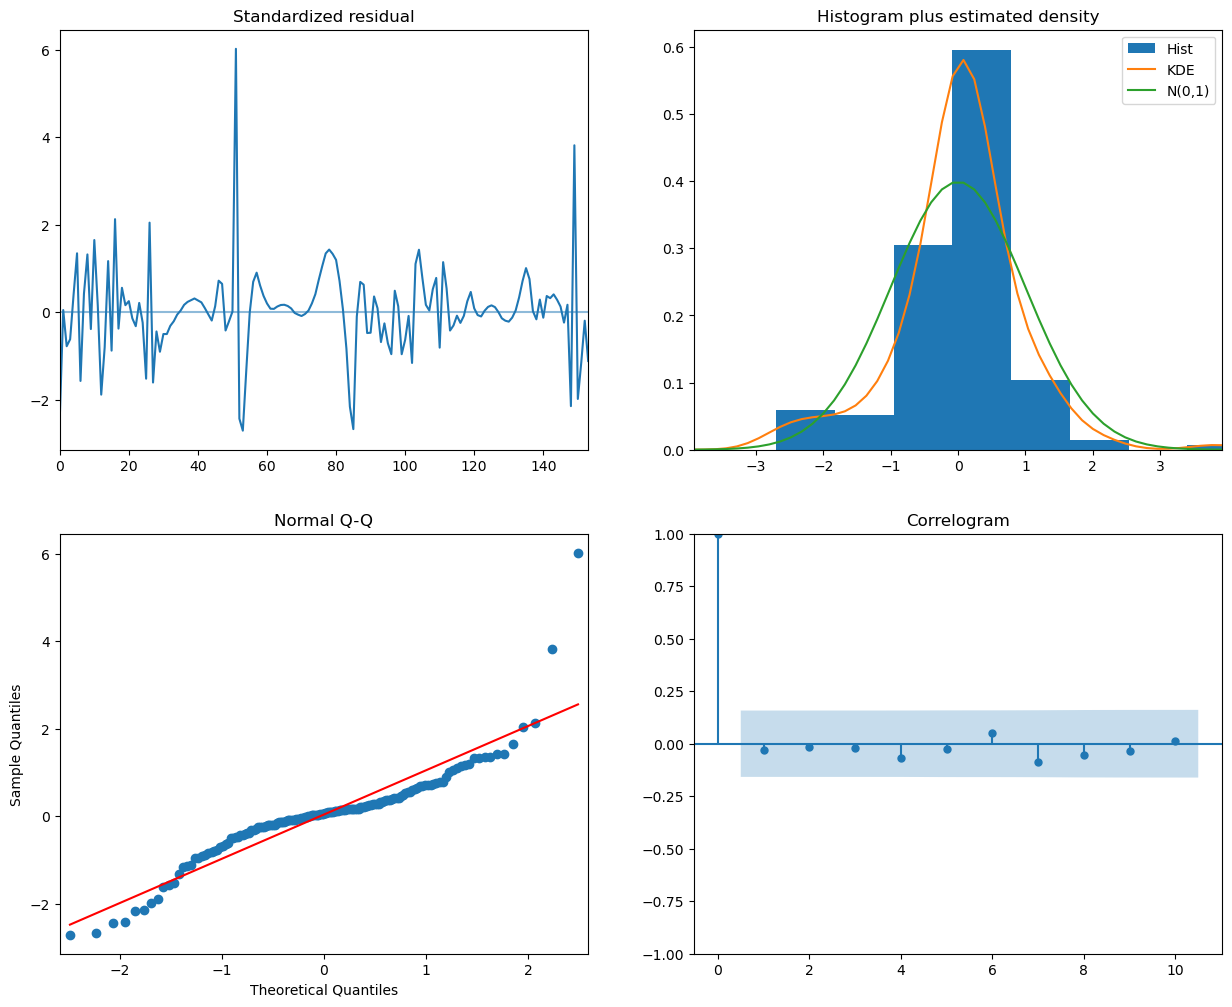

In [41]:
ARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [42]:
def forecast(ARIMA_model, periods=24):
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='MS')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(df["#Passengers"], color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)

    plt.title("ARIMA/SARIMA - Forecast of Airline Passengers")
    plt.show()

forecast(ARIMA_model)

/Users/user/opt/anaconda3/envs/learn-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/user/opt/anaconda3/envs/learn-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


TypeError: unsupported operand type(s) for +: 'int' and 'DateOffset'

In [64]:
#import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series data using an additive model
seasonal_decompose(Cow['Cow'].resample('MS').mean().dropna(), model='additive').plot()
plt.show()


ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose

def decompose_time_series(data_series, freq='MS', model='additive'):
    # Fill missing values using forward fill
    resampled_data = data_series.resample(freq).mean().ffill()

    # Decompose the time series data using an additive model
    decomposition = seasonal_decompose(resampled_data, model=model)
    decomposition.plot()
    plt.show()

In [65]:
def decompose_time_series(data_series, freq='MS', model='additive'):
    # Fill missing values with the mean of the series
    data_series.fillna(data_series.mean(), inplace=True)
    
    # Decompose the time series data using an additive model
    decomposition = seasonal_decompose(data_series.resample(freq).mean().ffill(), model=model)
    
    # Gather the trend, seasonality, and residuals 
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Plot gathered statistics
    plt.figure(figsize=(12,8))
    plt.subplot(411)
    plt.plot(np.log(data_series), label='Original', color='blue')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='blue')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality', color='blue')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='blue')
    plt.legend(loc='best')
    plt.suptitle('Decomposition of {} Time Series'.format(data_series.name))
    plt.tight_layout()
    plt.show()

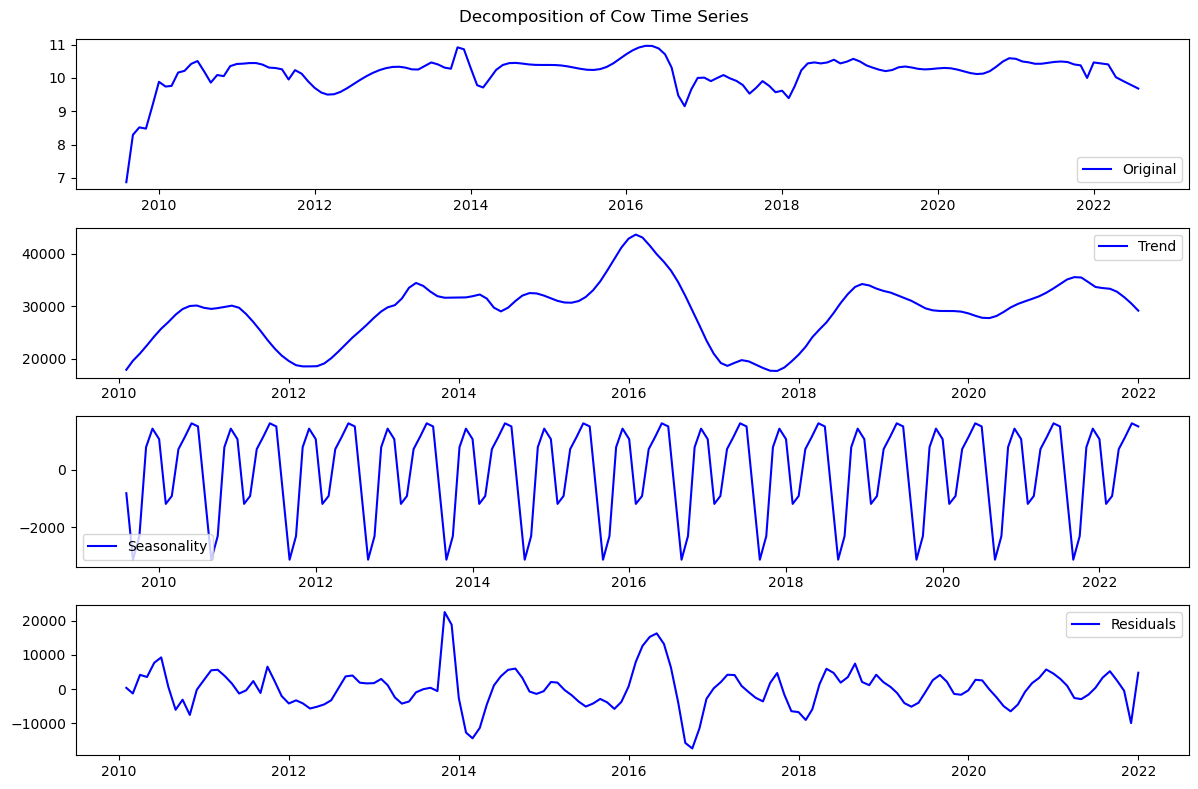

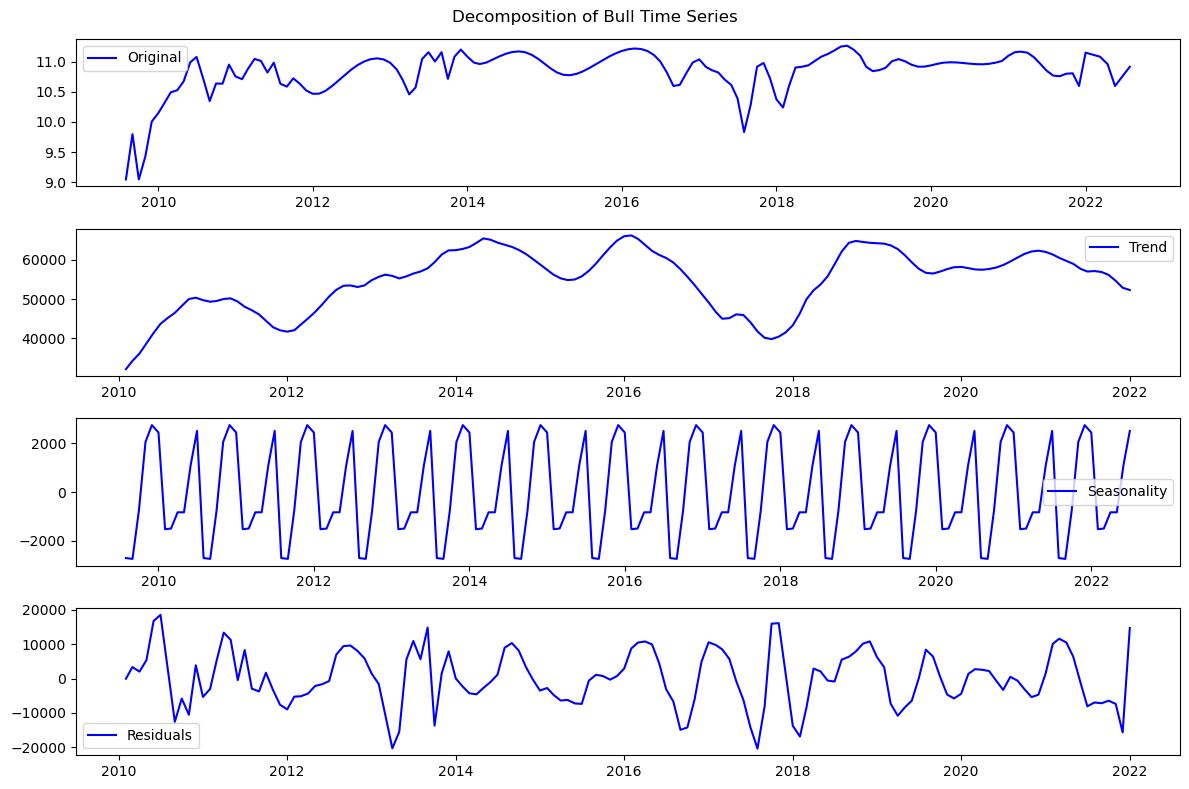

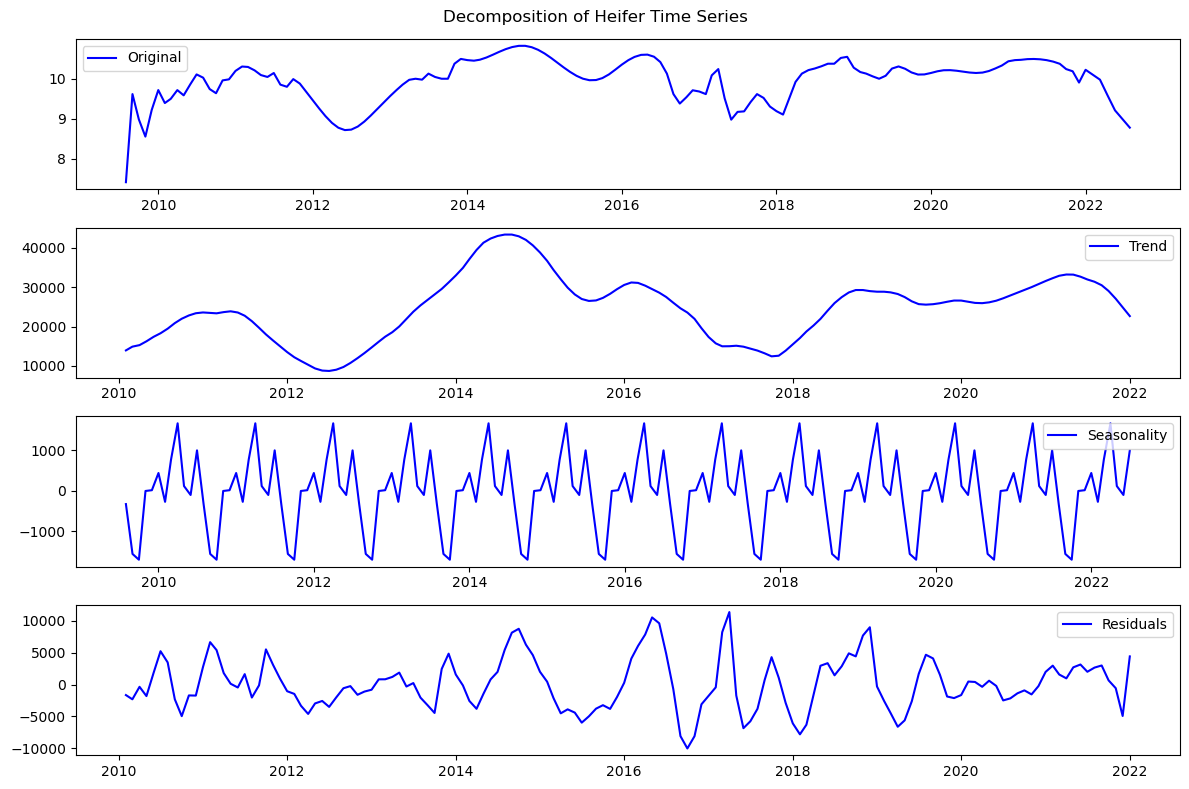

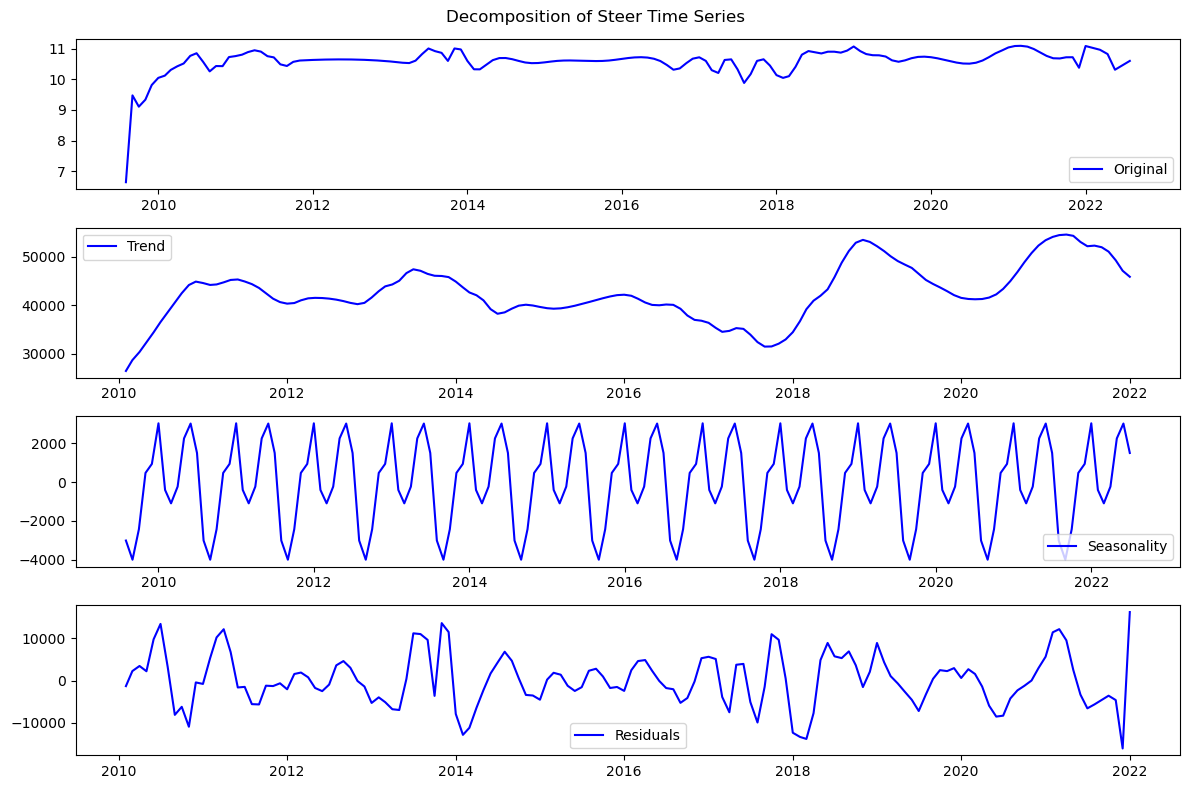

In [66]:
# Assuming you have the time series stored in variables Cow, Bull, Heifer, and Steer

time_series_list = [Cow['Cow'], Bull['Bull'], Heifer['Heifer'], Steer['Steer']]
for series in time_series_list:
    decompose_time_series(series)


The parameters of the ARIMA model are defined as follows:

* p: The lag order, representing the number of lag observations incorporated in the model.
* d: Degree of differencing, denoting the number of times raw observations undergo differencing.
* q: Order of moving average, indicating the size of the moving average window.

In [75]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [73]:
# from pandas.plotting import autocorrelation_plot
# autocorrelation_plot(Cow)
# plt.show()

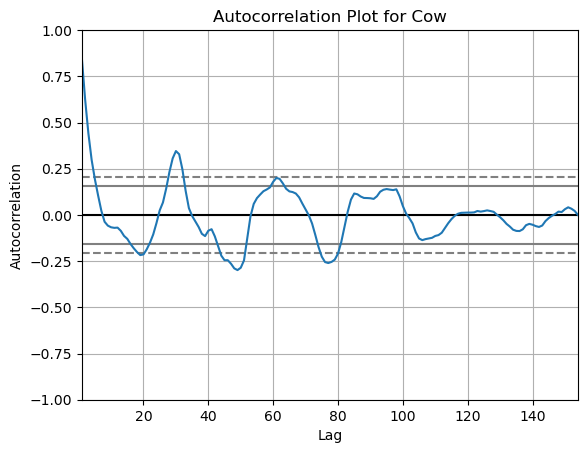

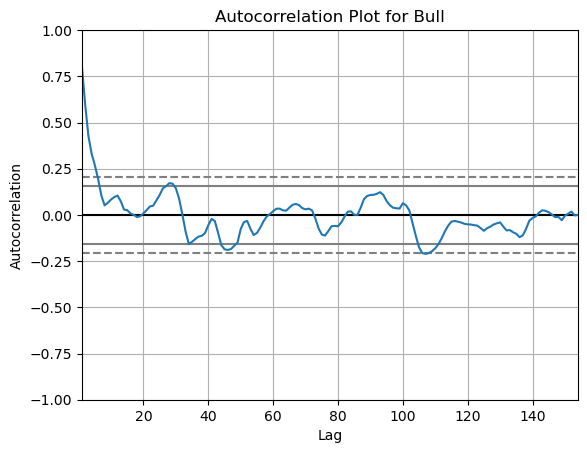

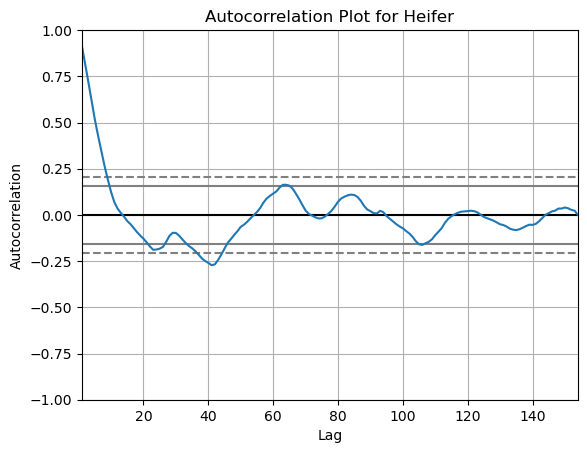

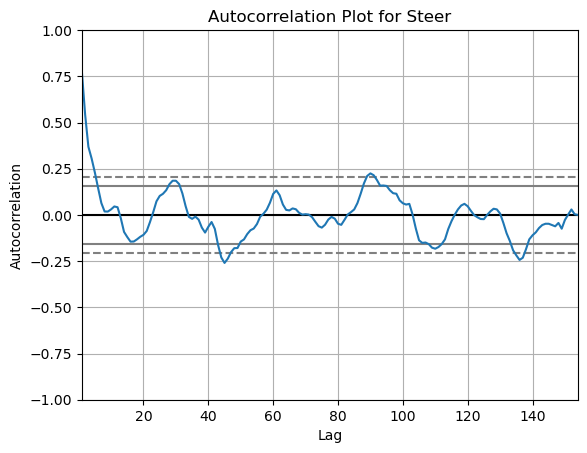

In [72]:
from pandas.plotting import autocorrelation_plot

ts_list = [Cow['Cow'], Bull['Bull'], Heifer['Heifer'], Steer['Steer']]
for series in ts_list:
    autocorrelation_plot(series)
    plt.title('Autocorrelation Plot for {}'.format(series.name))
    plt.show()

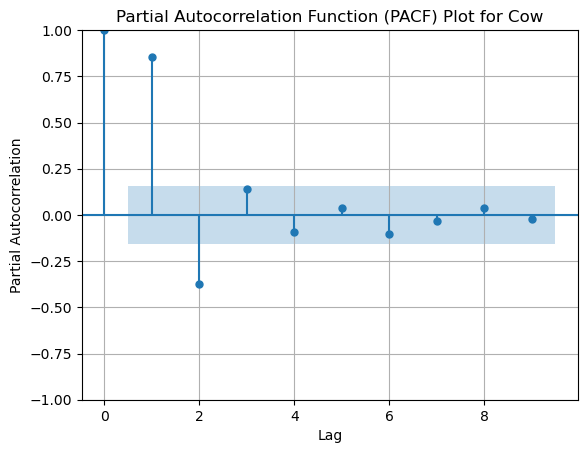

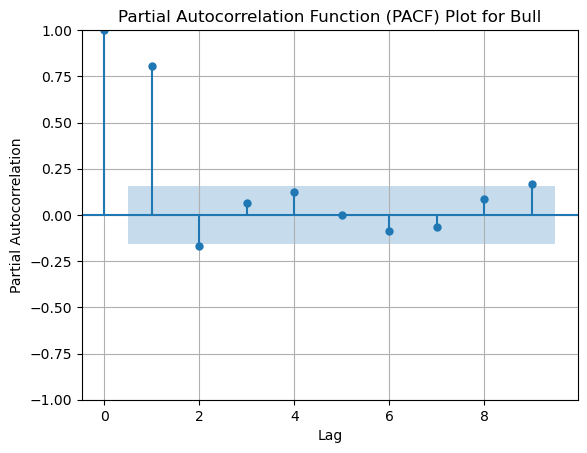

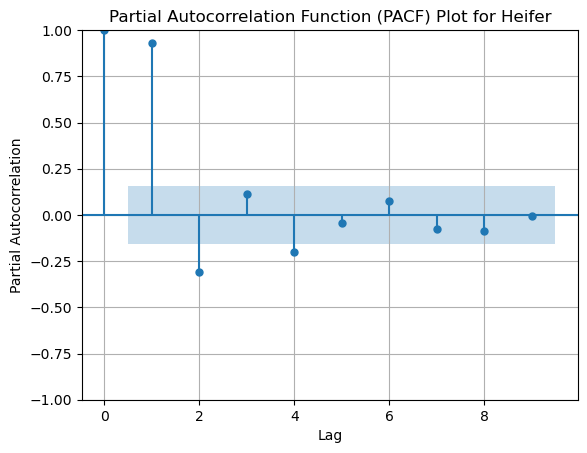

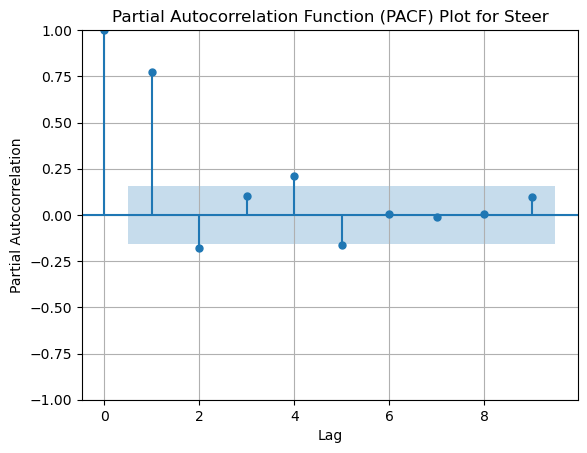

In [74]:
from statsmodels.graphics.tsaplots import plot_pacf

ts_list = [Cow['Cow'], Bull['Bull'], Heifer['Heifer'], Steer['Steer']]

for series in ts_list:
    plot_pacf(series, lags=9, method='ols')
    plt.xlabel('Lag')
    plt.ylabel('Partial Autocorrelation')
    plt.title('Partial Autocorrelation Function (PACF) Plot for {}'.format(series.name))
    plt.grid(True)
    plt.show()



In [77]:
# from statsmodels.tsa.arima.model import ARIMA
# # fit model
# model = ARIMA(Cow, order=(8,1,0))
# model_fit = model.fit()
# # summary of fit model
# print(model_fit.summary())
# # line plot of residuals
# residuals = pd.DataFrame(model_fit.resid)
# residuals.plot()
# plt.show()
# # density plot of residuals
# residuals.plot(kind='kde')
# plt.show()
# # summary stats of residuals
# print(residuals.describe())

                               SARIMAX Results                                
Dep. Variable:                    Cow   No. Observations:                  154
Model:                 ARIMA(8, 1, 0)   Log Likelihood               -1505.866
Date:                Tue, 05 Mar 2024   AIC                           3029.733
Time:                        20:46:48   BIC                           3057.006
Sample:                             0   HQIC                          3040.812
                                - 154                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3662      0.045      8.216      0.000       0.279       0.454
ar.L2         -0.2882      0.050     -5.785      0.000      -0.386      -0.191
ar.L3          0.0417      0.090      0.464      0.6

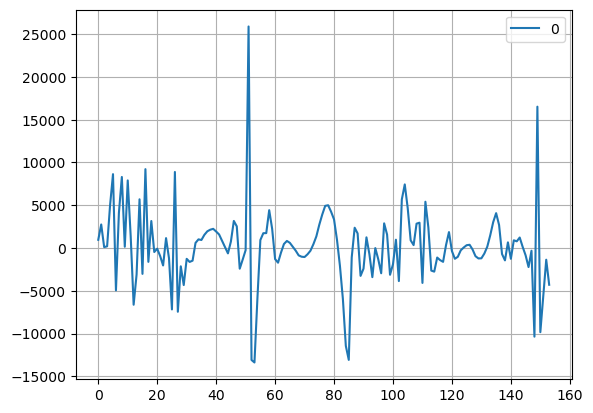

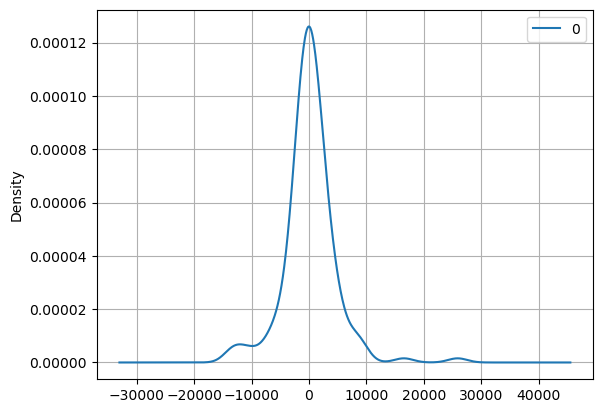

Summary stats for residuals
                  0
count    154.000000
mean     155.493284
std     4548.302293
min   -13368.140090
25%    -1396.235781
50%      129.406274
75%     1839.701738
max    25894.634943
                               SARIMAX Results                                
Dep. Variable:                   Bull   No. Observations:                  154
Model:                 ARIMA(8, 1, 0)   Log Likelihood               -1579.298
Date:                Tue, 05 Mar 2024   AIC                           3176.596
Time:                        20:46:49   BIC                           3203.870
Sample:                             0   HQIC                          3187.675
                                - 154                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar

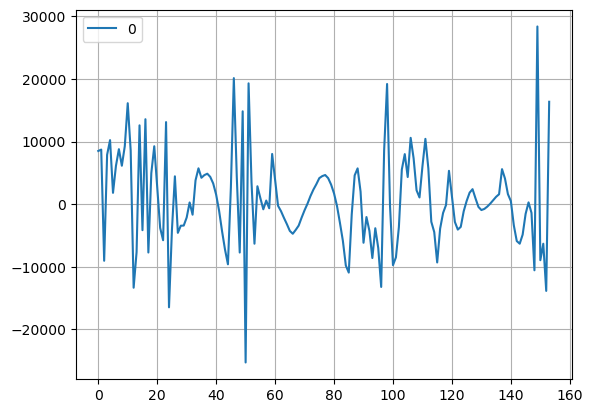

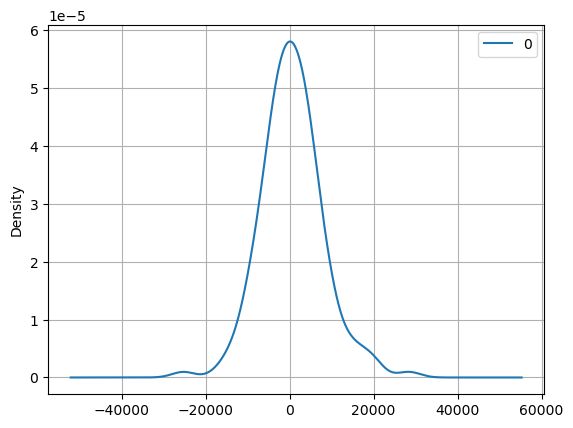

Summary stats for residuals
                  0
count    154.000000
mean     618.863255
std     7364.060285
min   -25290.551446
25%    -3886.106564
50%      280.997409
75%     4475.299445
max    28389.324560
                               SARIMAX Results                                
Dep. Variable:                 Heifer   No. Observations:                  154
Model:                 ARIMA(8, 1, 0)   Log Likelihood               -1462.216
Date:                Tue, 05 Mar 2024   AIC                           2942.432
Time:                        20:46:49   BIC                           2969.706
Sample:                             0   HQIC                          2953.511
                                - 154                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar

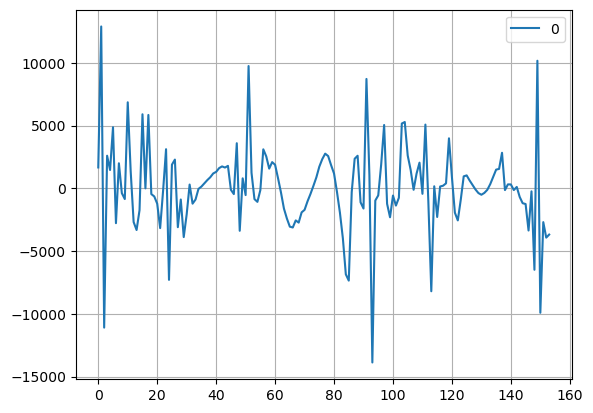

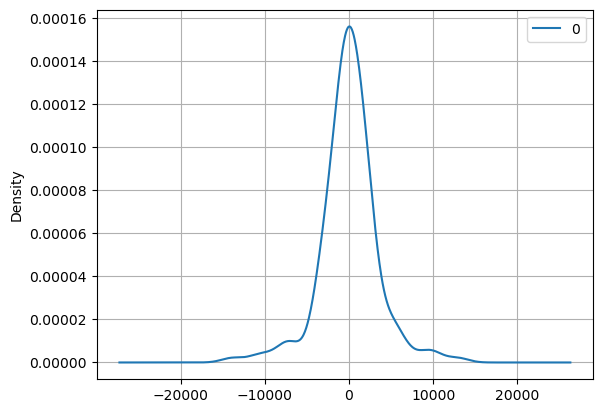

Summary stats for residuals
                  0
count    154.000000
mean      23.252371
std     3423.043514
min   -13874.978044
25%    -1226.788166
50%     -102.176763
75%     1601.565335
max    12899.965808
                               SARIMAX Results                                
Dep. Variable:                  Steer   No. Observations:                  154
Model:                 ARIMA(8, 1, 0)   Log Likelihood               -1545.151
Date:                Tue, 05 Mar 2024   AIC                           3108.302
Time:                        20:46:50   BIC                           3135.576
Sample:                             0   HQIC                          3119.381
                                - 154                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar

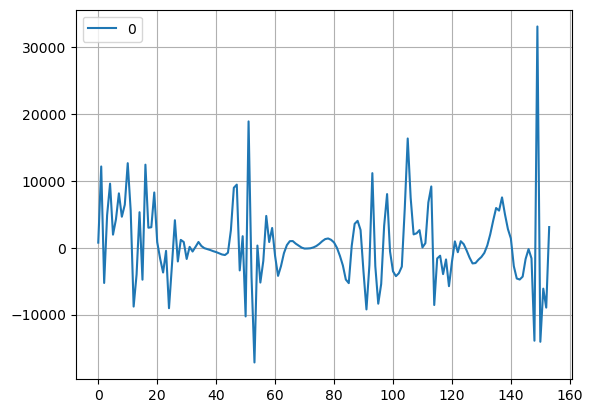

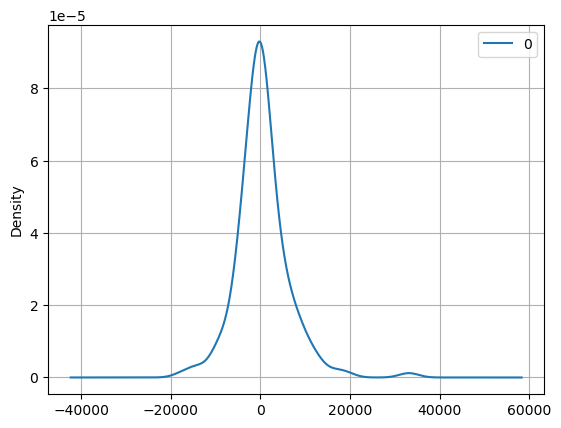

Summary stats for residuals
                  0
count    154.000000
mean     452.679240
std     5876.037474
min   -17168.711545
25%    -2332.307064
50%       34.791712
75%     2647.001110
max    33110.507590


In [81]:
def arima_model_fit(series):
    # Reset index to remove date index
    series = series.reset_index(drop=True)

    # Fit ARIMA model
    model = ARIMA(series, order=(8,1,0))
    model_fit = model.fit()

    # Summary of fit model
    print(model_fit.summary())

    # Line plot of residuals
    residuals = pd.DataFrame(model_fit.resid)  # Define DataFrame
    residuals.plot()
    plt.grid(True)
    plt.show()

    # Density plot of residuals
    residuals.plot(kind='kde')
    plt.grid(True)
    plt.show()

    # Summary stats of residuals
    print('Summary stats for residuals')
    print(residuals.describe())

arima_model_fit_loop([Cow['Cow'], Bull['Bull'], Heifer['Heifer'], Steer['Steer']])


These statistics provide insight into the distribution and variation of residuals, which are the differences between observed and predicted values in a regression analysis. The mean close to zero indicates that, on average, the residuals are centered around zero, suggesting that the model is unbiased. The standard deviation reflects the dispersion of residuals around the mean, with a relatively high value indicating considerable variability in the data. The minimum and maximum values represent the range of residuals, showing the extent of deviation from the predicted values. The quartiles (25th, 50th, and 75th percentiles) provide information about the distribution's spread and central tendency, with the median indicating the middle value of the dataset.

predicted=14668.854433, expected=15000.000000
predicted=16783.780423, expected=12000.000000
predicted=11800.372853, expected=17166.530361
predicted=21270.142925, expected=27666.666667
predicted=30492.425400, expected=34000.000000
predicted=34671.002771, expected=35041.168963
predicted=34093.903119, expected=33997.549820
predicted=32392.449459, expected=35000.000000
predicted=35625.707525, expected=38000.000000
predicted=38278.471360, expected=34000.000000
predicted=29712.365764, expected=35882.785220
predicted=36748.325919, expected=39000.000000
predicted=38044.744538, expected=36000.000000
predicted=33396.578412, expected=32000.000000
predicted=30334.721410, expected=30000.000000
predicted=28845.072429, expected=28146.182784
predicted=27799.651261, expected=27000.000000
predicted=26795.109829, expected=27883.622514
predicted=27976.960330, expected=30250.461392
predicted=30915.832399, expected=30977.265419
predicted=30694.750292, expected=30079.377655
predicted=29467.079416, expected=2

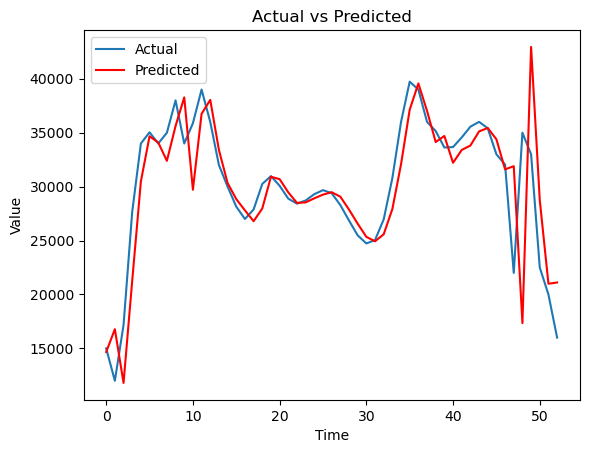

In [82]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

# Splitting the data into train and test sets
X = Cow.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# Walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(8, 1, 1 ))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# Evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# Plot forecasts against actual outcomes
plt.plot(test, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [56]:
# from sklearn.model_selection import train_test_split
# train, test = train_test_split(Cow, test_size = 0.40, shuffle = False) # Shuffle = False is IMPORTANT!
# def train_test_plot(train, test):
#     plt.figure(figsize=(16, 8))
#     plt.plot(train, c='blue')
#     plt.plot(test, c='orange');

# train_test_plot(train, test)

In [115]:
import warnings
warnings.filterwarnings('ignore')
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
from datetime import datetime
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [118]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [120]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(Cow,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}: AIC Calculated={}'.format(comb, combs, output.aic))
        except:
            continue

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.16487D+01    |proj g|=  2.17604D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   2.176D-07   1.165D+01
  F =   11.648653627119186     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 0, 0) x (0, 0, 0, 12): AIC Calculated=3589.7853171527095
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.69515D+00    |proj g|=  8.61597D-04

At iterate   10    f=  8.69515D+00    |proj g|=  7.64175D-04

At iterate   15    f=  8.69505D+00    |proj g|=  1.16050D-02

At iterate   20    f=  8.68470D+00    |proj g|=  1.07436D-01

At iterate   25    f=  8.55423D+00    |proj g|=  6.36829D-02

At iterate   30    f=  8.54946D+00    |proj g|=  4.36478D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     39      1     0     0   7.216D-07   8.549D+00
  F =   8.5494635025290595     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 0, 1) x (0, 1, 1, 12): AIC Calculated=263

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  8.69399D+00    |proj g|=  4.49928D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     12      1     0     0   4.499D-05   8.694D+00
  F =   8.6939928353273626     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 0, 1) x (1, 1, 1, 12): AIC Calculated=2685.749793280828
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.81032D+00    |proj g|=  2.12186D-06

           * * *

Tit   = total number of iterations
Tnf   = tota

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     14      1     0     0   1.681D-05   9.024D+00
  F =   9.0240923862588360     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 1, 0) x (1, 0, 1, 12): AIC Calculated=2785.4204549677215
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51290D+00    |proj g|=  5.19833D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segm

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      6      1     0     0   4.505D-06   9.179D+00
  F =   9.1791147902474215     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (0, 1, 1) x (0, 1, 0, 12): AIC Calculated=2831.167355396206
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.24876D+00    |proj g|=  1.52305D-01

At iterate    5    f=  8.21123D+00    |proj g|=  1.71550D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  8.89071D+00    |proj g|=  1.78177D-02

At iterate   15    f=  8.89018D+00    |proj g|=  1.25615D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     29      1     0     0   1.756D-05   8.890D+00
  F =   8.8901765769852297     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 1, 1) x (1, 0, 1, 12): AIC Calculated=2746.1743857114507
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.45035D+00    |proj g|=  3.16718D-02

  

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.21115D+00    |proj g|=  1.49766D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     14      1     0     0   6.023D-05   8.211D+00
  F =   8.2111501624512471     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 1, 1) x (1, 1, 1, 12): AIC Calculated=2537.034250034984
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.86972D+00    |proj g|=  1.78067D-04

           * * *

Tit   = total number of iterations
Tnf   = tota

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


At iterate    5    f=  8.39881D+00    |proj g|=  3.68861D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     16      1     0     0   1.028D-04   8.398D+00
  F =   8.3984060404920040     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 0) x (0, 1, 1, 12): AIC Calculated=2592.709060471537
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.44711D+00    |proj g|=  8.00290D-01

At iterate    5    f=  9.08793D+00    |proj g|=  2.51705D-01

    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.49371D+00    |proj g|=  6.51463D-04

At iterate   10    f=  8.49359D+00    |proj g|=  1.33775D-02

At iterate   15    f=  8.48794D+00    |proj g|=  9.79618D-02

At iterate   20    f=  8.48482D+00    |proj g|=  1.40670D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     25      1     0     0   1.407D-06   8.485D+00
  F =   8.4848211818496182     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA (1, 0, 0) x (1, 1, 0, 12): AIC Calculated=2619.3249240096825
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =        

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.25665D+00    |proj g|=  4.29374D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     14      1     0     0   5.341D-05   8.257D+00
  F =   8.2566237864413647     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 1) x (0, 1, 1, 12): AIC Calculated=2551.04012622394
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.33555D+00    |proj g|=  7.24017D-01

At iterate    5    f=  9.01680D+00    |proj g|=  6.34017D-02

At i

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.40030D+00    |proj g|=  2.58627D-05

At iterate   10    f=  8.40030D+00    |proj g|=  2.39670D-03

At iterate   15    f=  8.39978D+00    |proj g|=  3.03705D-02

At iterate   20    f=  8.39215D+00    |proj g|=  1.65341D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     28      1     0     0   1.675D-05   8.392D+00
  F =   8.3920337528102209     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 1) x (1, 1, 0, 12): AIC Calculated=2592.746395865548
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =         

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.26076D+00    |proj g|=  5.18033D-02

At iterate   10    f=  8.25654D+00    |proj g|=  3.75191D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     17      1     0     0   5.346D-05   8.257D+00
  F =   8.2565351622296124     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 0, 1) x (1, 1, 1, 12): AIC Calculated=2553.012829966721
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.76434D+00    |proj g|=  5.40687D-06

   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA (1, 1, 0) x (0, 1, 1, 12): AIC Calculated=2562.035970836853
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.97931D+00    |proj g|=  8.18455D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      4      1     0     0   2.046D-05   8.979D+00
  F =   8.9792709619761411     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 1, 0) x (1, 0, 0, 12): AIC Calculated=2771.6154562886513
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     13      1     0     0   5.800D-05   8.299D+00
  F =   8.2986679425536618     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 1, 0) x (1, 1, 1, 12): AIC Calculated=2563.9897263065277
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.67524D+00    |proj g|=  4.02627D-02

At iterate    5    f=  9.67455D+00    |proj g|=  1.53942D-04

           * * *

Tit   = total number of iterations
Tnf   = tot

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.21069D+00    |proj g|=  3.05386D-03

At iterate   10    f=  8.21061D+00    |proj g|=  6.01897D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     17      1     0     0   6.019D-05   8.211D+00
  F =   8.2106093963766575     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 1, 1) x (0, 1, 1, 12): AIC Calculated=2536.8676940840105
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.95646D+00    |proj g|=  1.66615D-02

At

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  8.88855D+00    |proj g|=  9.06743D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     29      1     0     0   1.924D-05   8.889D+00
  F =   8.8885474643397249     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 1, 1) x (1, 0, 1, 12): AIC Calculated=2747.6726190166355
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.38348D+00    |proj g|=  2.93672D-02

At iterate    5    f=  8.38292D+00    |proj g|=  4.17318D-04

  

 This problem is unconstrained.



At iterate    5    f=  8.21060D+00    |proj g|=  5.12765D-03

At iterate   10    f=  8.21054D+00    |proj g|=  3.76408D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     17      1     0     0   6.018D-05   8.211D+00
  F =   8.2105408433873777     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (1, 1, 1) x (1, 1, 1, 12): AIC Calculated=2538.846579763312


In [121]:
def grid_search_sarimax(pdq, pdqs, series):
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(series,
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                output = mod.fit(disp=False)
                ans.append([comb, combs, output.aic])
                print('ARIMA {} x {}: AIC Calculated={}'.format(comb, combs, output.aic))
            except Exception as e:
                print(e)
                continue

    # Find the best parameters
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
    best_params = ans_df.loc[ans_df['aic'].idxmin()]
    print("Best Parameters (AIC): ", best_params)
    return best_params
best_params = grid_search_sarimax(pdq, pdqs, Cow)

ARIMA (0, 0, 0) x (0, 0, 0, 12): AIC Calculated=3589.7853171527095
ARIMA (0, 0, 0) x (0, 0, 1, 12): AIC Calculated=3241.7705949217407
ARIMA (0, 0, 0) x (0, 1, 0, 12): AIC Calculated=3097.020080749976
ARIMA (0, 0, 0) x (0, 1, 1, 12): AIC Calculated=2793.6866538834574
ARIMA (0, 0, 0) x (1, 0, 0, 12): AIC Calculated=3117.836036840081
ARIMA (0, 0, 0) x (1, 0, 1, 12): AIC Calculated=3070.9074531315423
ARIMA (0, 0, 0) x (1, 1, 0, 12): AIC Calculated=2821.1438336465526
ARIMA (0, 0, 0) x (1, 1, 1, 12): AIC Calculated=2787.668769737101
ARIMA (0, 0, 1) x (0, 0, 0, 12): AIC Calculated=3456.0151384326555
ARIMA (0, 0, 1) x (0, 0, 1, 12): AIC Calculated=3165.118318916473
ARIMA (0, 0, 1) x (0, 1, 0, 12): AIC Calculated=2955.1305623804747
ARIMA (0, 0, 1) x (0, 1, 1, 12): AIC Calculated=2639.2347587789504
ARIMA (0, 0, 1) x (1, 0, 0, 12): AIC Calculated=3200.7334493580083
ARIMA (0, 0, 1) x (1, 0, 1, 12): AIC Calculated=3156.071249939719
ARIMA (0, 0, 1) x (1, 1, 0, 12): AIC Calculated=2732.3324566121446


In [122]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (0, 1, 1)
pdqs    (0, 1, 1, 12)
aic       2535.056542
Name: 27, dtype: object

In [106]:
def forecast(ARIMA_model, df, periods=24):
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    
    last_date = pd.to_datetime(df.index[-1])
    index_of_fc = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_periods, freq='MS')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15, 7))
    plt.plot(Cow['Cow'], color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color='k', alpha=.15)

    plt.title("ARIMA/SARIMA - Forecast of Cow Sales")
    plt.show()

# Call the forecast function with appropriate arguments
forecast(ARIMA_model, Cow)

TypeError: predict() missing 1 required positional argument: 'params'

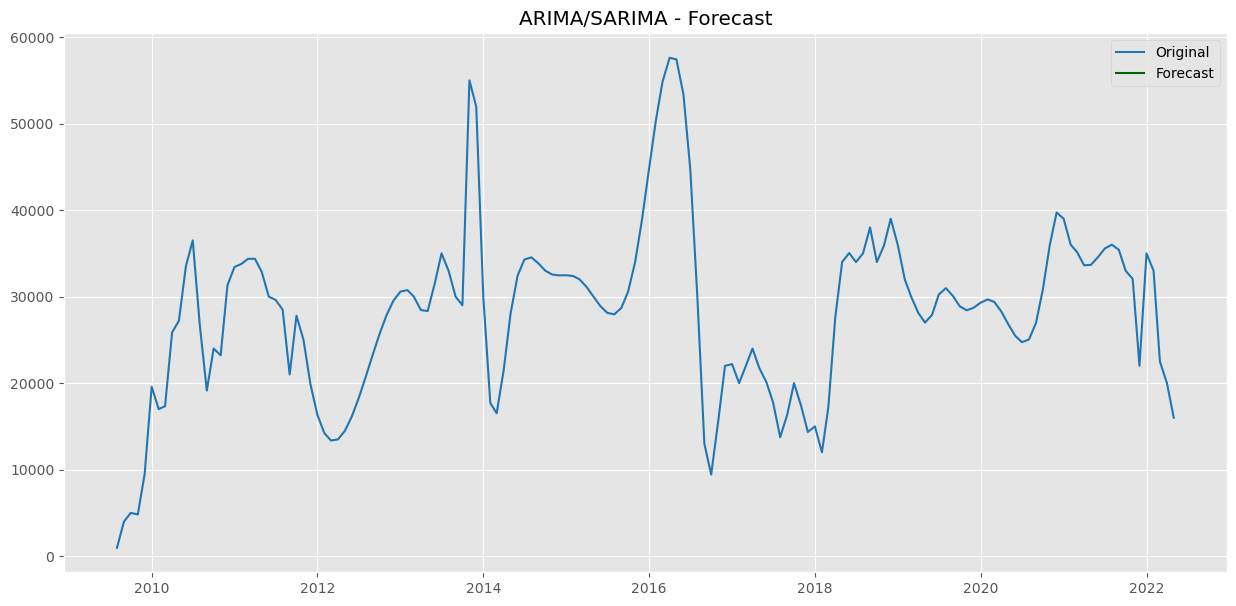

In [107]:
def forecast(ARIMA_model, series, periods=24):
    # Forecast
    n_periods = periods
    pred_conf = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)

    if isinstance(pred_conf, tuple):  # If the return is a tuple
        fitted = pred_conf[0]
        confint = pred_conf[1]
    else:  # If the return is a single array
        fitted = pred_conf
        confint = None
    
    last_date = pd.to_datetime(series.index[-1])
    index_of_fc = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_periods, freq='MS')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    if confint is not None:
        lower_series = pd.Series(confint[:, 0], index=index_of_fc)
        upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15, 7))
    plt.plot(series, color='#1f76b4', label='Original')
    plt.plot(fitted_series, color='darkgreen', label='Forecast')
    if confint is not None:
        plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)

    plt.title("ARIMA/SARIMA - Forecast")
    plt.legend()
    plt.show()

# Example usage:
#Replace ARIMA_model with your ARIMA model and Cow['Cow'] with your actual data series
forecast(ARIMA_model_fit, Cow['Cow'])


In [108]:
# Seasonal - fit stepwise auto-ARIMA
SARIMA_model = pm.auto_arima(Cow['Cow'], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=12, #12 is the frequency of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)


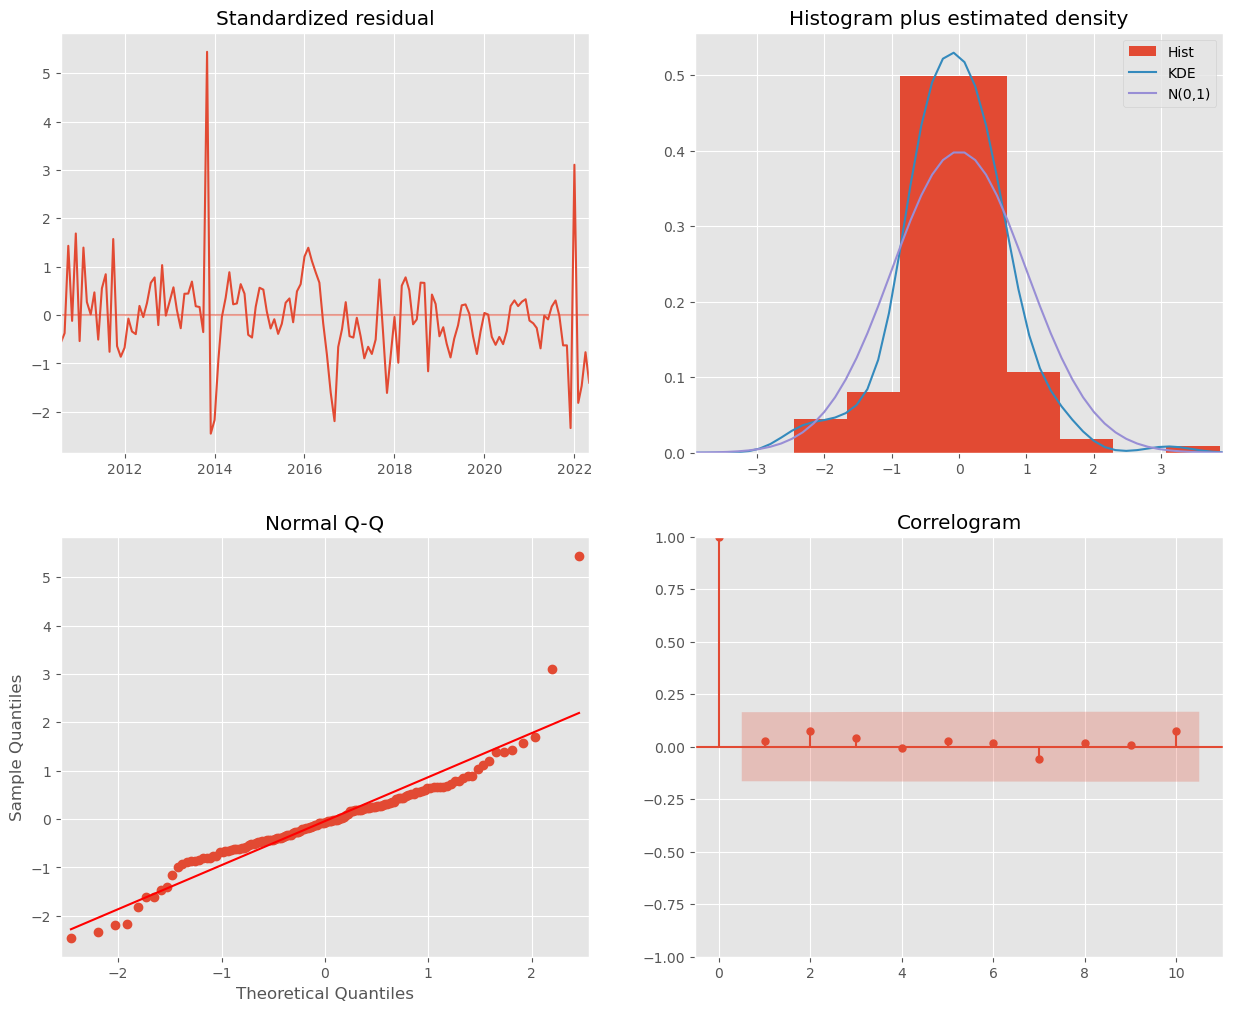

In [109]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

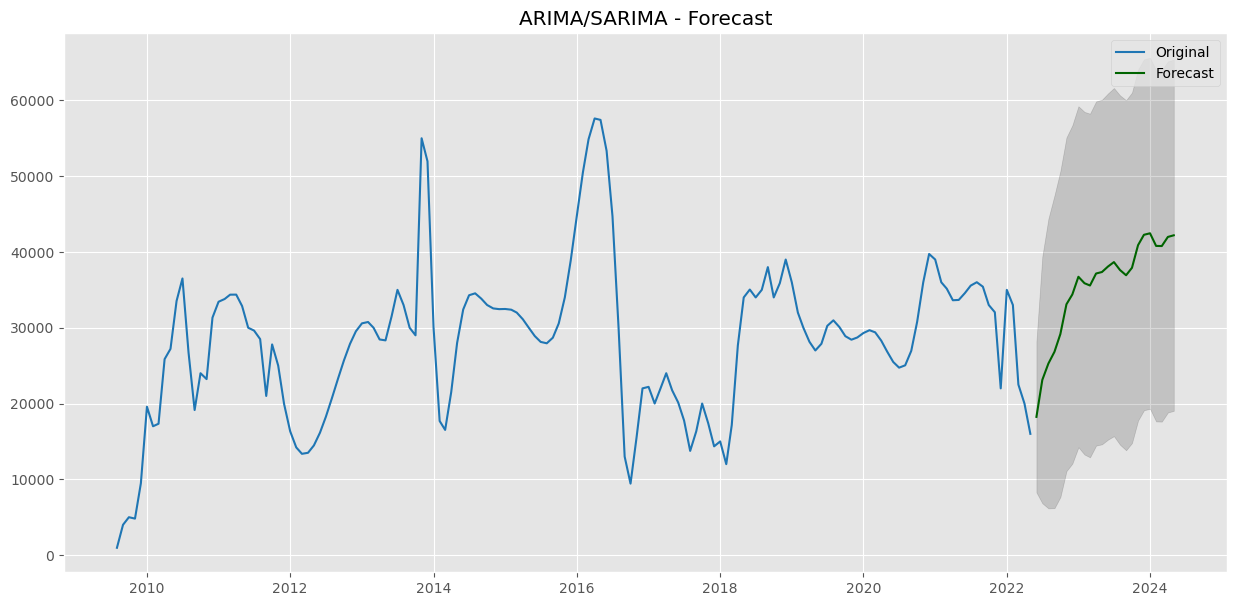

In [110]:
forecast(SARIMA_model, Cow, periods=24)

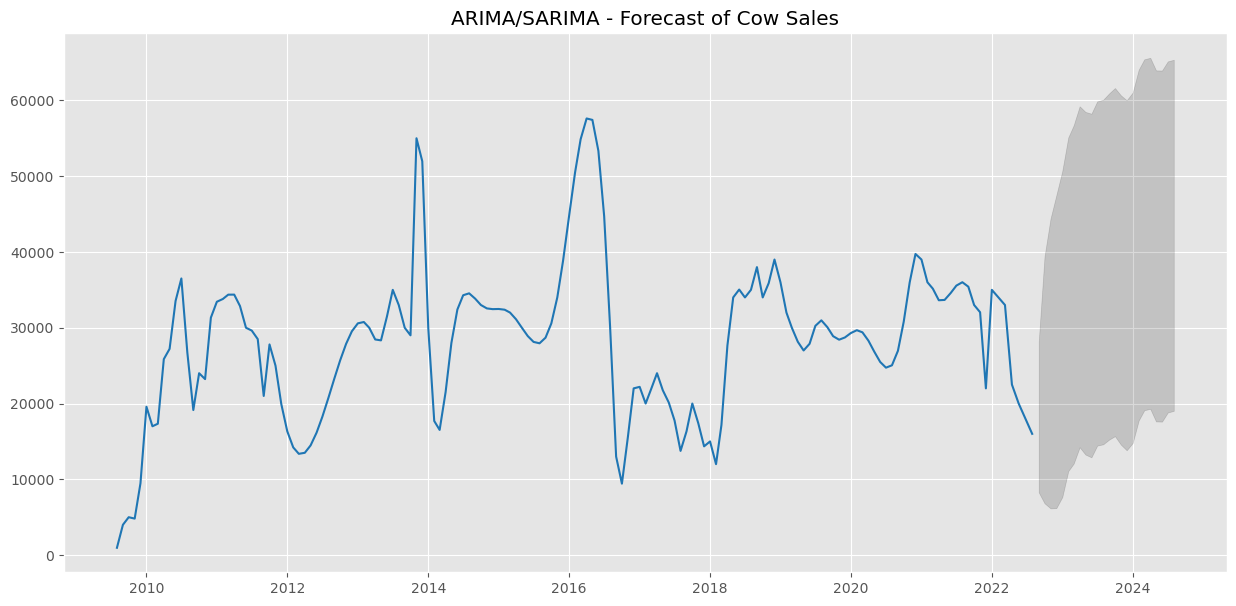

In [96]:
forecast(SARIMA_model, Heifer, periods=24)

In [116]:
def forecast(ARIMA_model, df, periods=24):
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    
    last_date = pd.to_datetime(df.index[-1])
    index_of_fc = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_periods, freq='MS')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15, 7))
    plt.plot(Cow['Cow'], color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color='k', alpha=.15)

    plt.title("ARIMA/SARIMA - Forecast of Airline Passengers")
    plt.show()

# Call the forecast function with appropriate arguments
forecast(ARIMA_model, Cow)


TypeError: predict() missing 1 required positional argument: 'params'

In [98]:
# Set the index of Cow dataframe to a datetime index with frequency
Cow.index = pd.date_range(start=Cow.index[0], periods=len(Cow), freq='MS')

def forecast(ARIMA_model, df, periods=24):
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    
    last_date = pd.to_datetime(df.index[-1])
    index_of_fc = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_periods, freq='MS')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15, 7))
    plt.plot(df['Cow'], color='#1f76b4')
    plt.plot(fitted_series, color='orange')
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color='k', alpha=.15)

    plt.title("ARIMA/SARIMA - Forecast of Cow Population")
    plt.show()

# Call the forecast function with appropriate arguments
forecast(ARIMA_model, Cow)


TypeError: predict() missing 1 required positional argument: 'params'

In [104]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# # Fit SARIMA model
# sarima_model = SARIMAX(Cow, order=(8, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust seasonal_order as needed
# sarima_model_fit = sarima_model.fit()

# # Summary of fit model
# print(sarima_model_fit.summary())

# # Line plot of residuals
# residuals = sarima_model_fit.resid
# residuals.plot()
# plt.title('Line Plot of SARIMA Residuals')
# plt.show()

# # Density plot of residuals
# residuals.plot(kind='kde')
# plt.title('Density Plot of SARIMA Residuals')
# plt.show()

# # Summary stats of residuals
# print(residuals.describe())


In [119]:
# # Splitting the data into train and test sets
# X = Cow.values
# size = int(len(X) * 0.66)
# train, test = X[0:size], X[size:len(X)]
# history = [x for x in train]
# predictions = list()

# # Walk-forward validation
# for t in range(len(test)):
#     model = SARIMAX(history, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))  # Adjust seasonal_order as needed
#     model_fit = model.fit()
#     output = model_fit.forecast()
#     yhat = output[0]
#     predictions.append(yhat)
#     obs = test[t]
#     history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))

# # Evaluate forecasts
# rmse = sqrt(mean_squared_error(test, predictions))
# print('Test RMSE: %.3f' % rmse)

# # Plot forecasts against actual outcomes
# plt.plot(test, label='Actual')
# plt.plot(predictions, color='red', label='Predicted')
# plt.title('Actual vs Predicted')
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.legend()
# plt.show()


In [113]:
# # Splitting the data into train and test sets
# X = Cow.values
# size = int(len(X) * 0.66)
# train, test = X[0:size], X[size:len(X)]
# history = [x for x in train]
# predictions = list()
# results = {'predicted': [], 'expected': []}

# # Walk-forward validation
# for t in range(len(test)):
#     model = SARIMAX(history, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))  # Adjust seasonal_order as needed
#     model_fit = model.fit()
#     output = model_fit.forecast()
#     yhat = output[0]
#     predictions.append(yhat)
#     obs = test[t]
#     history.append(obs)
#     results['predicted'].append(yhat)
#     results['expected'].append(obs)

# # Store results in a DataFrame
# results_df = pd.DataFrame(results)

# # Evaluate forecasts
# rmse = sqrt(mean_squared_error(results_df['expected'], results_df['predicted']))
# print('Test RMSE: %.3f' % rmse)

# # Plot forecasts against actual outcomes
# plt.plot(results_df['expected'], label='Actual')
# plt.plot(results_df['predicted'], color='red', label='Predicted')
# plt.title('Actual vs Predicted')
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.legend()
# plt.show()

# # Display results DataFrame
# print(results_df)


predicted=12662.850943, expected=15000.000000
predicted=14639.151783, expected=12000.000000
predicted=11223.517865, expected=17166.530361
predicted=21670.909222, expected=27666.666667
predicted=30847.074426, expected=34000.000000
predicted=36151.764093, expected=35041.168963
predicted=34401.443393, expected=33997.549820
predicted=30983.469793, expected=35000.000000
predicted=34208.901651, expected=38000.000000
predicted=41332.309383, expected=34000.000000
predicted=33627.678342, expected=35882.785220
predicted=38366.668418, expected=39000.000000
predicted=38736.454168, expected=36000.000000
predicted=33101.094252, expected=32000.000000
predicted=32402.628754, expected=30000.000000
predicted=31534.139870, expected=28146.182784
predicted=27535.144352, expected=27000.000000
predicted=27442.154642, expected=27883.622514
predicted=27885.258895, expected=30250.461392
predicted=28892.686826, expected=30977.265419
predicted=29794.487200, expected=30079.377655
predicted=31234.156971, expected=2

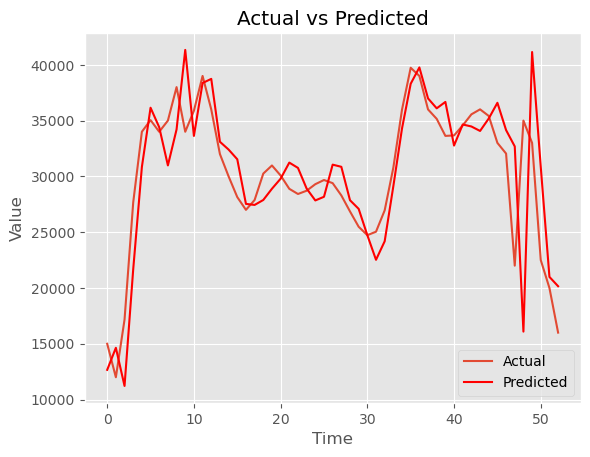

In [117]:

# Splitting the data into train and test sets
X = Cow.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# Walk-forward validation
for t in range(len(test)):
    model = SARIMAX(history, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))  # Adjust seasonal_order as needed
    model_fit = model.fit(disp=False)  # Suppress optimization process details
    output = model_fit.forecast()
    yhat = output[0]
    obs = test[t]
    predictions.append(yhat)
    print('predicted=%f, expected=%f' % (yhat, obs))
    history.append(obs)

# Evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# Plot forecasts against actual outcomes
plt.plot(test, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [77]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (0, 1, 1)
pdqs    (0, 1, 1, 12)
aic       2535.056542
Name: 27, dtype: object

In [78]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(Cow, 
                                        order=(0, 1, 1), 
                                        seasonal_order=(0, 1, 1, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.24876D+00    |proj g|=  1.52305D-01

At iterate    5    f=  8.21123D+00    |proj g|=  1.71550D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     14      1     0     0   6.622D-05   8.211D+00
  F =   8.2112225378526560     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------

 This problem is unconstrained.


In [123]:
import statsmodels.api as sm

# Define the optimal parameters
optimal_order = (0, 1, 1)
optimal_seasonal_order = (0, 1, 1, 12)

# Create SARIMAX model with optimal parameters
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(Cow, 
                                        order=optimal_order, 
                                        seasonal_order=optimal_seasonal_order, 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()
print(output.summary().tables[1])


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.24876D+00    |proj g|=  1.52305D-01

At iterate    5    f=  8.21123D+00    |proj g|=  1.71550D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     14      1     0     0   6.622D-05   8.211D+00
  F =   8.2112225378526560     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4487      0.066      6.822      0.000       0.320       0.578
ma.S.L12      -0.9831      0.106     -9.271      0.000      -1.191      -0.775
sigma2      4.118e+07   1.94e-09   2.12e+16      0.000    4.12e+07    4.12e+07


In [124]:
# Define the optimal parameters
optimal_order = (0, 1, 1)
optimal_seasonal_order = (0, 1, 1, 12)

# Create SARIMAX model with optimal parameters
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(Cow, 
                                        order=optimal_order, 
                                        seasonal_order=optimal_seasonal_order, 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model
output = ARIMA_MODEL.fit()

# Extract AIC value
AIC_value = output.aic

# Print in the desired format
print(f"ARIMA {optimal_order} x {optimal_seasonal_order}: AIC Calculated={AIC_value}")

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.24876D+00    |proj g|=  1.52305D-01

At iterate    5    f=  8.21123D+00    |proj g|=  1.71550D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     14      1     0     0   6.622D-05   8.211D+00
  F =   8.2112225378526560     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA (0, 1, 1) x (0, 1, 1, 12): AIC Calculated=2535.0565416586182


 This problem is unconstrained.


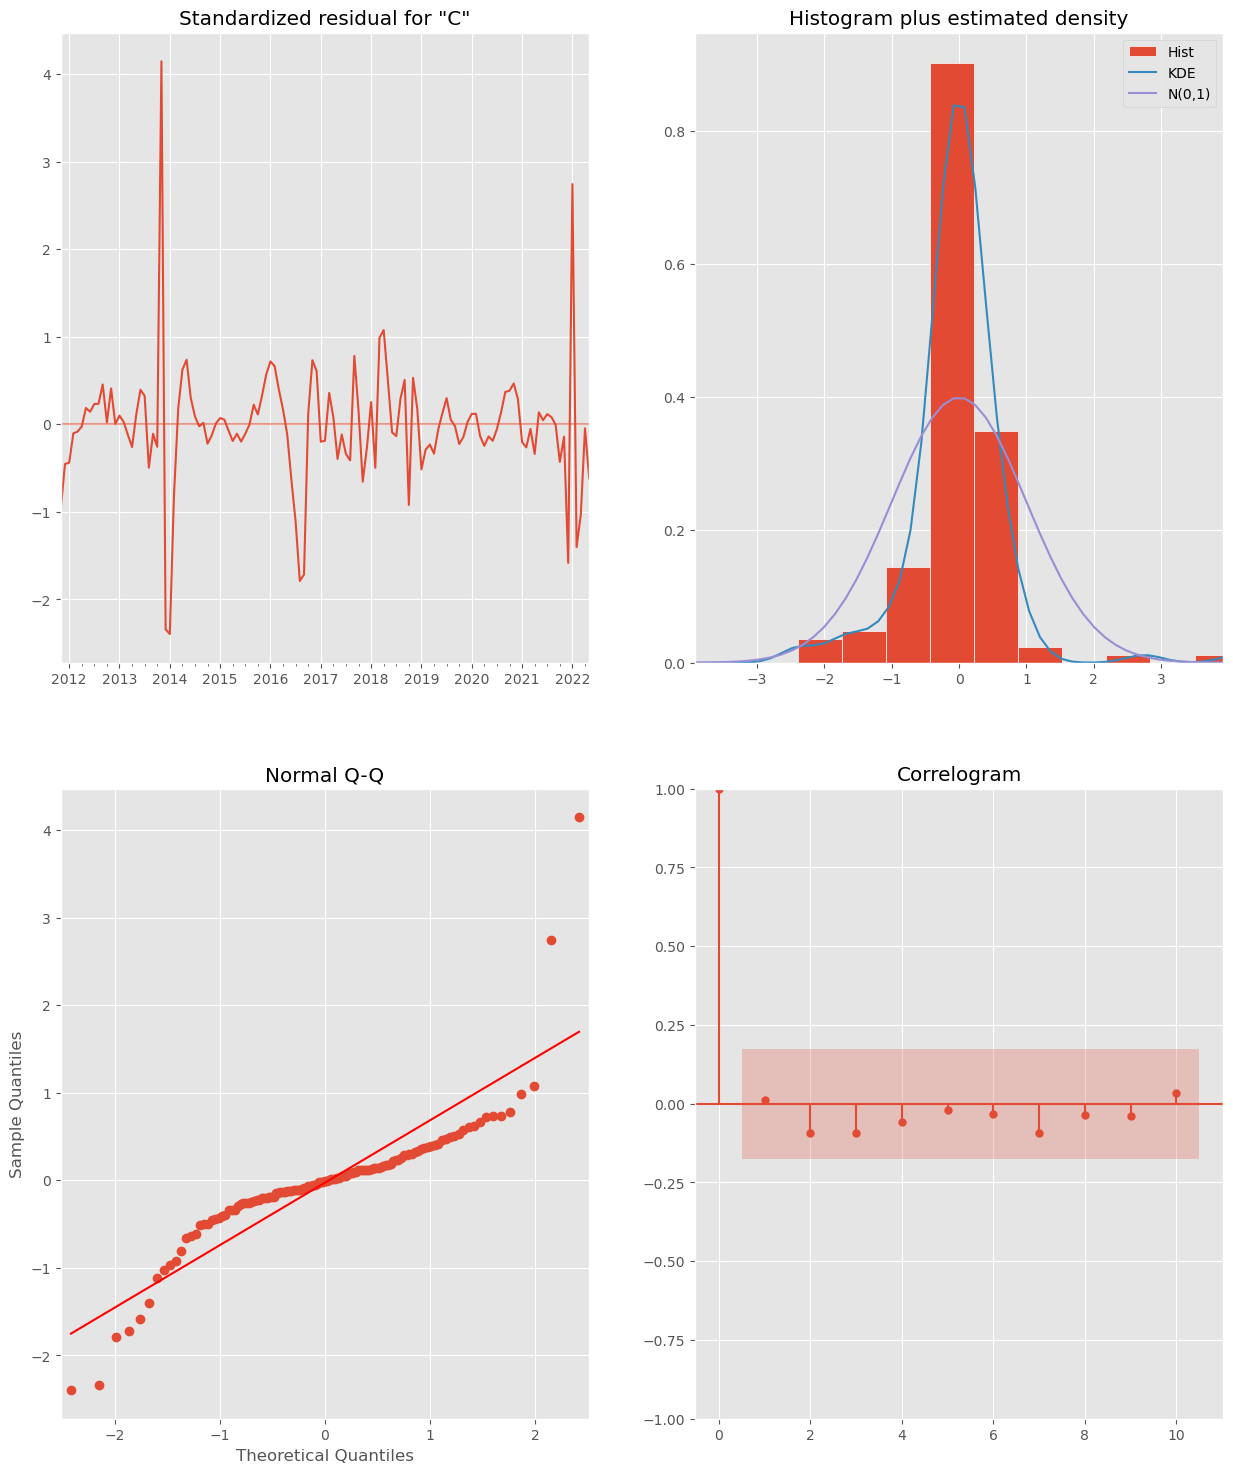

In [79]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()